# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
from google.colab import files

uploaded = files.upload()

Saving stock_data.csv to stock_data.csv


In [3]:
data =  pd.read_csv('stock_data.csv')

In [7]:
# copying data to another varaible to preserve original data
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [8]:
df.shape

(340, 15)

There are 340 rows and 15 columns.


In [13]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

In [12]:
#Check the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

* Columnn "Ticker Symbol," "Security," "GICS Sector," and "GICS Sub Industry" are  object data types. The rest are numberic datatype.


In [14]:
# checking for duplicate values
df.duplicated().sum()

0

In [16]:
# checking for missing values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

There is no duplicated data and missing values in the dataset.

# Statistical summary of the dataset

In [18]:
#check the statistical summary of the data
df.describe(include='all').T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327936   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

- There are 11 unique GICS sectors and 104 unique GICS sub-industries within the dataset. This suggests that the companies belong to a variety of industry sectors and sub-sectors.

- The mean current price is approximately $80.86, with a minimum of $4.50 and a maximum of $1,274.95. This indicates a wide range of stock prices within the dataset.

- The price change column has a mean of approximately 4.08, with a minimum value of -47.13 and a maximum value of 55.05. This suggests a wide variation in daily price changes.

- Most of the companies in the dataset belong to industrials.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

Univariate analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

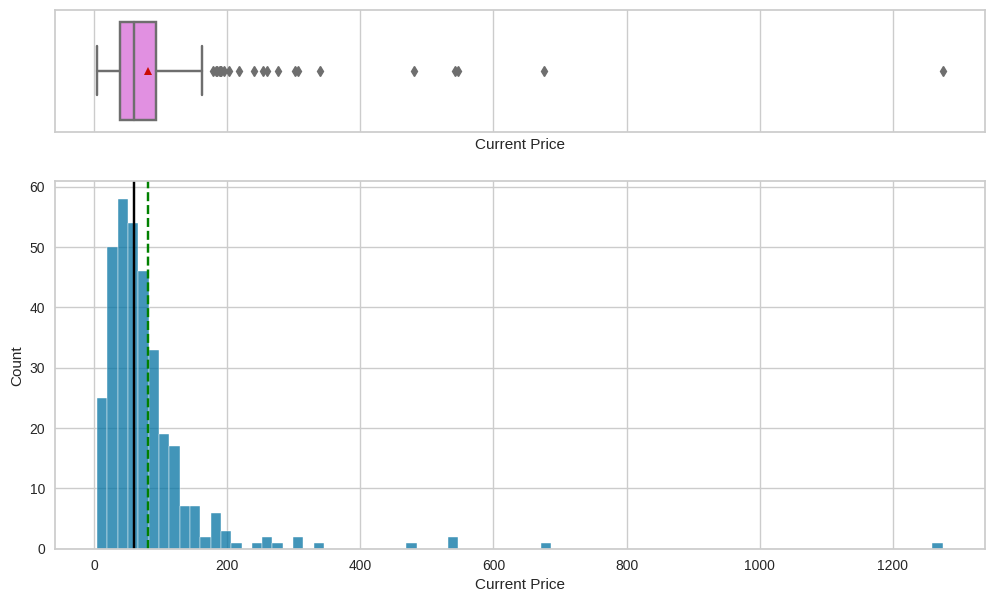

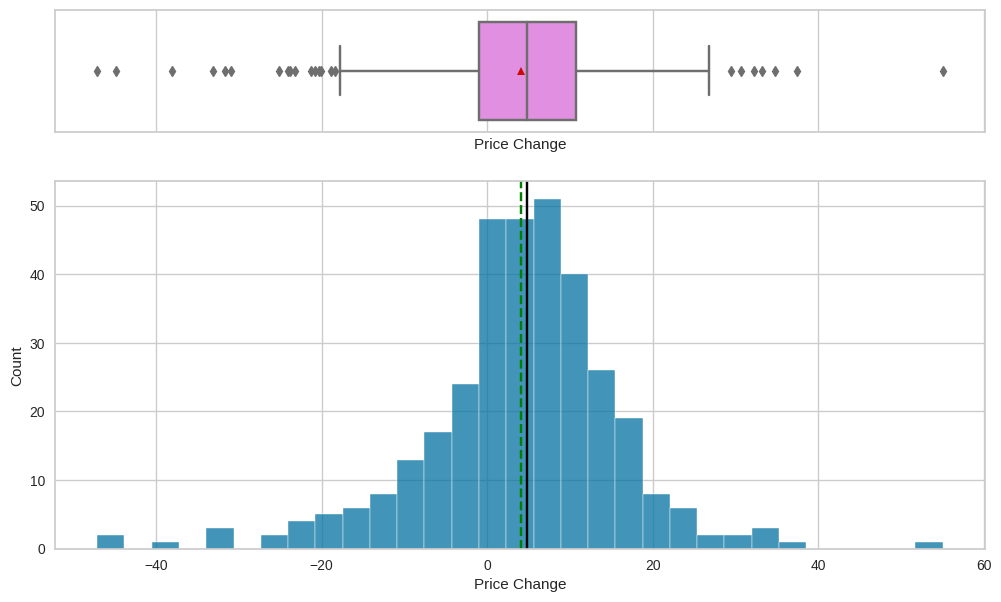

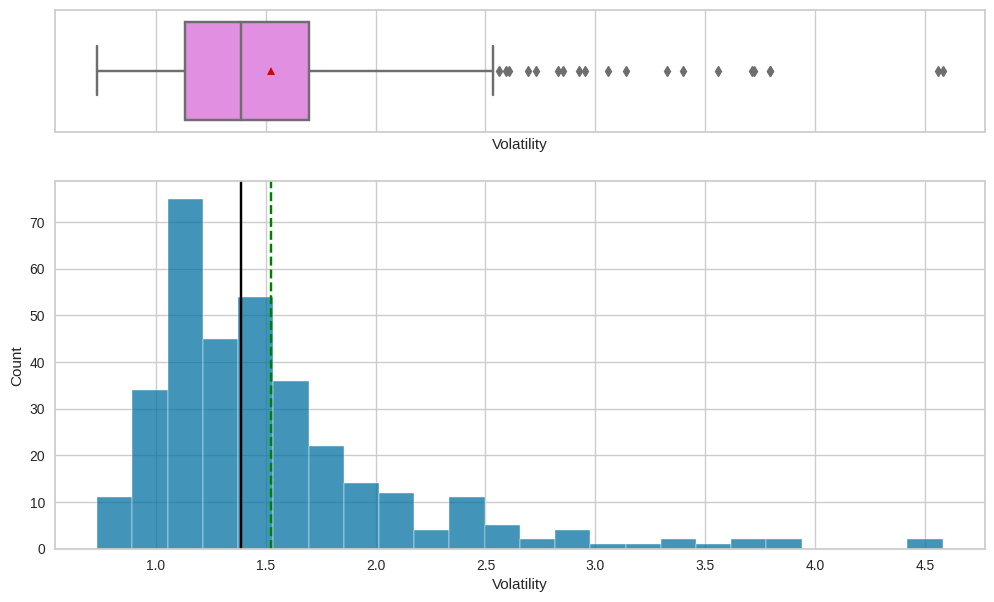

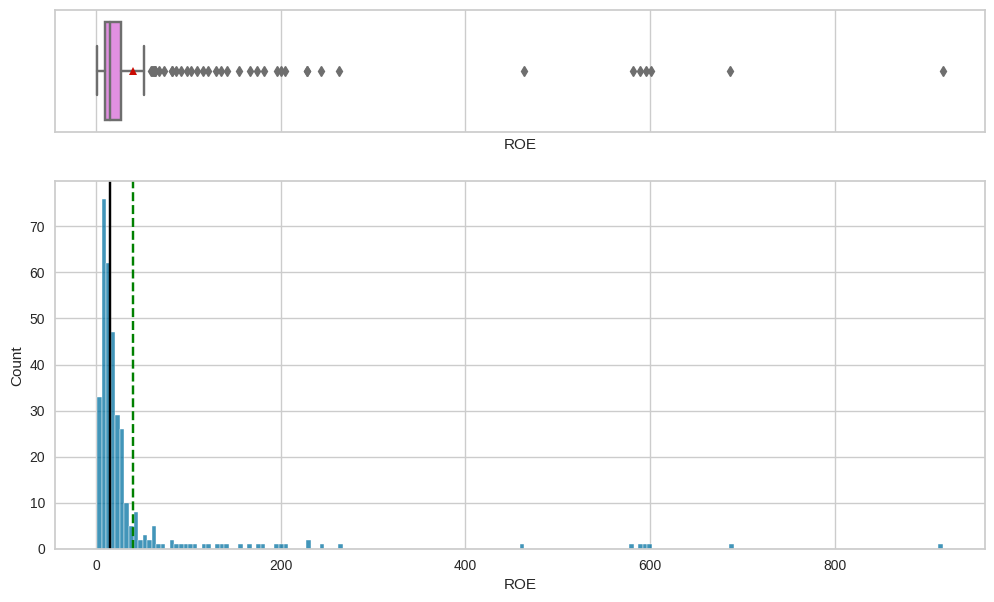

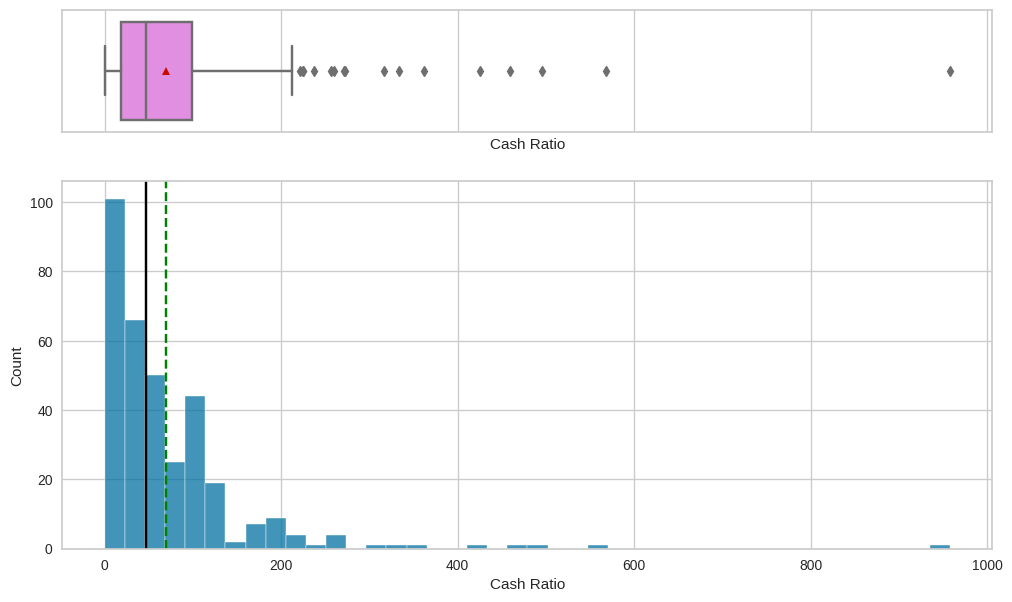

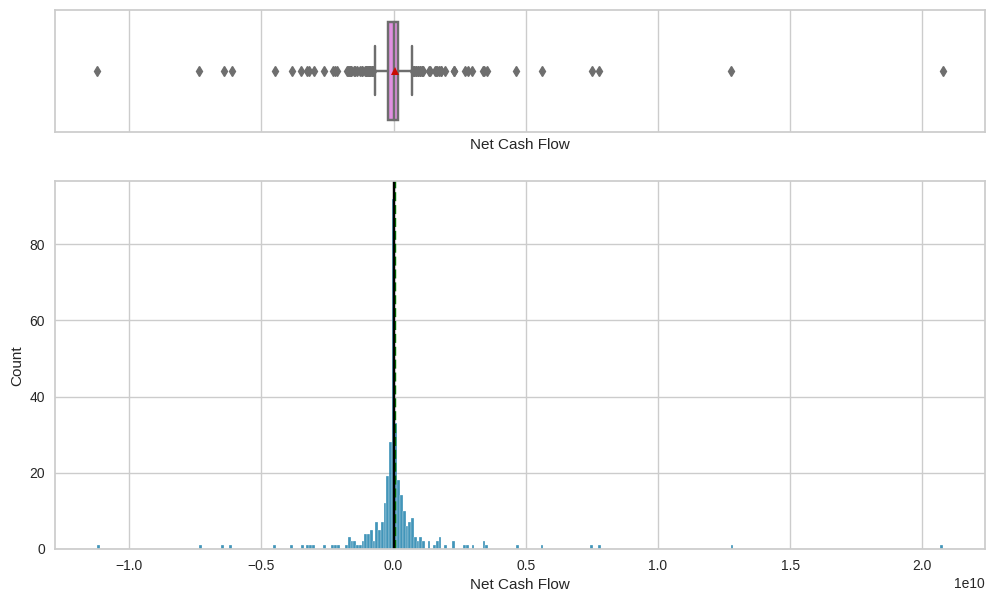

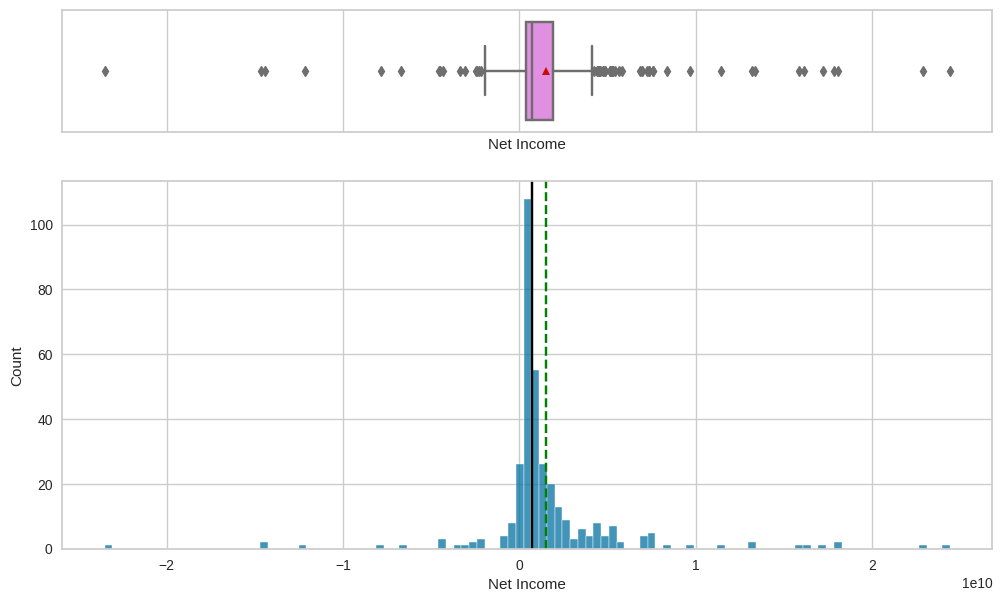

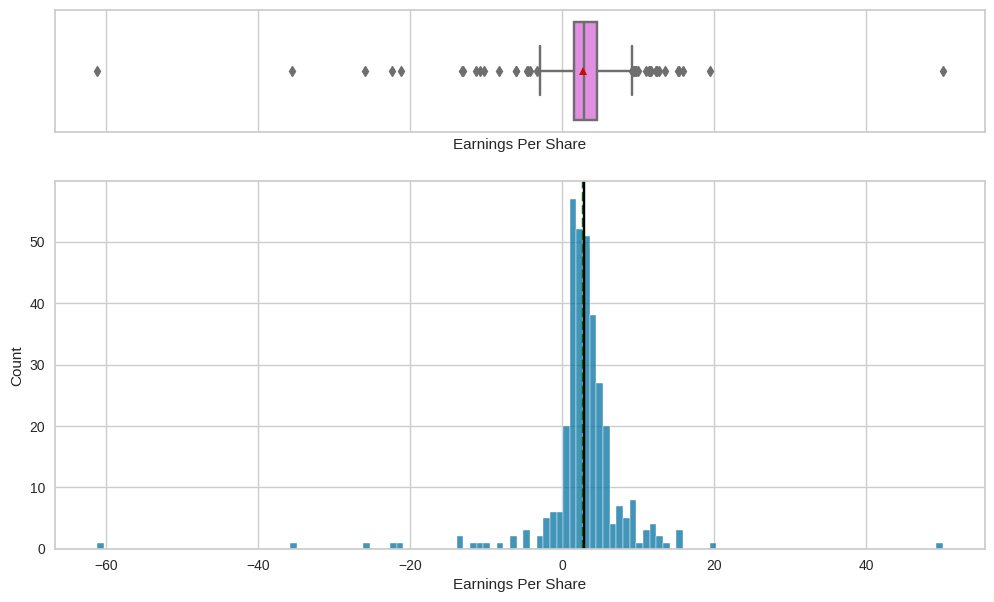

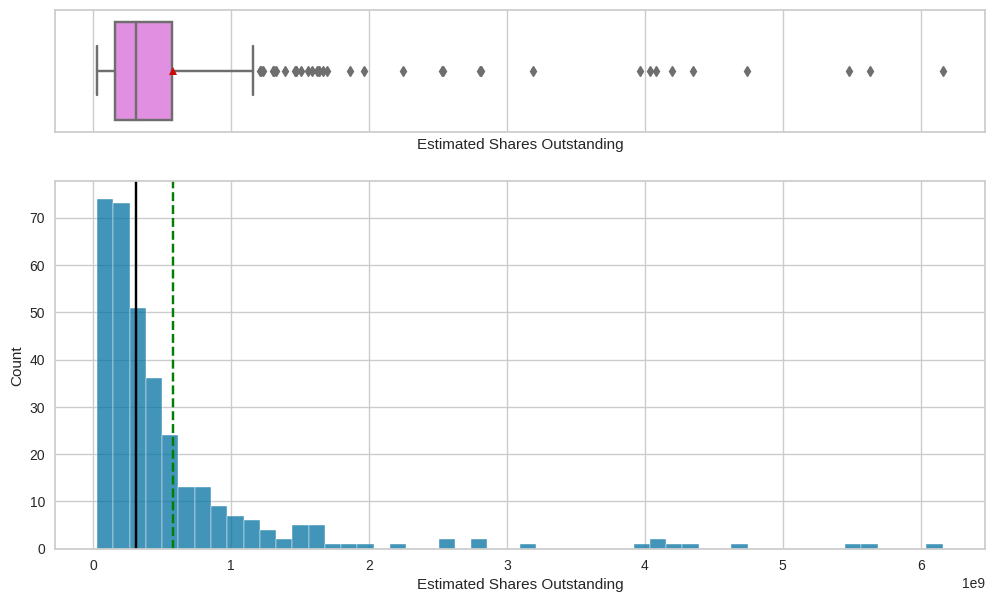

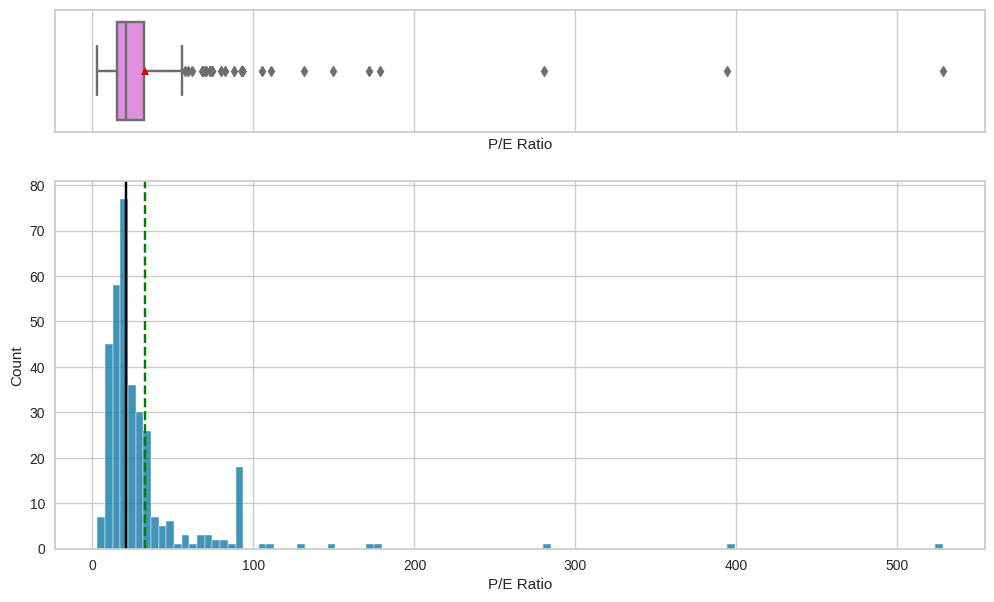

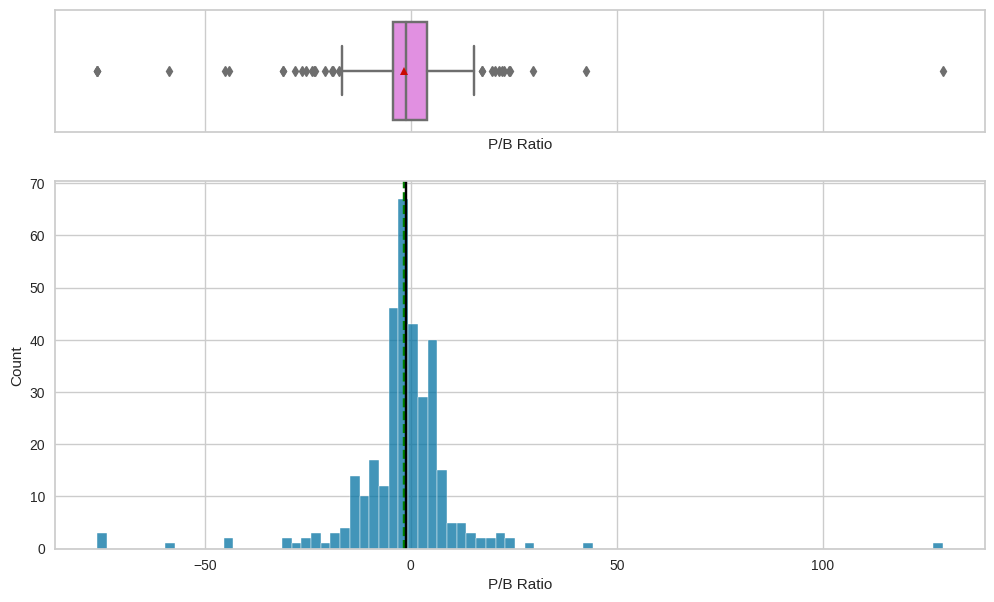

In [36]:
#create list of columns with numerical variables
num_col = df.select_dtypes(include=np.number).columns.tolist()

#display histograms and boxplots for all numerical columns
for col in num_col:
    histogram_boxplot(df, col)

obervation
- Current Price plot shows right-shewed distrubition with a long tail of the  distribution is on the right, with a few companies having exceptionally high stock prices.
- no stock is at 0 dolloars.
- It shows a wide range of price changes, with a relatively high standard deviation, indicating significant variability in stock price movements.

Price change
The plot shows a very slightly left-skewed distribution. It shows there are more extreme negative values (price decreases) than extreme positive values (price increases).

Volatility
The right-skewed distribution of Volatility shows that most companies have low volatility, and a smaller number of companies have exceptionally high volatility.
there are some outliers with much higher volatility on the right-hand side.

ROE
- It shows a right-shewed distrubition. There are a lot of outliers on the right-hand side.

Cash Ratio
- It shows a right-shewed distrubition. It implies that there are more companies with lower cash ratios than those with very high cash ratios.
There are a lot of outliers on the right-hand side, suggesting that  there are companies with very high cash reserves (outliers) that pull the mean higher.

Net Cash Flow
- It exsbit an approximately normal distribution, stating that many companies have typcial pattern of cash flow.  
- There are a lot of outliers on both sides, suggesting that the presence of both negative and positive outliers in the "Net Cash Flow" data suggests a wide range of financial positions among the companies in the dataset.

Net Income

Net income is shown to be right skewed with both long positive and negative tails, implied that while most companies have relatively lower net income, there are a few companies with significantly high net income, which can be an indicator of strong financial performance.

Earnings Per Share

The "Earnings Per Share" appears to exhibit right-skew distribution. It suggests that there are more companies with lower EPS values than those with very high EPS values.
There are some outliers present in this distribution, suggesting that that there are companies with exceptionally high Earnings Per Share values.

Estimated shares outstanding

It shows right-skew distribution with a long tail on the right hand side , suggesting that there are more companies with relatively lower numbers of estimated shares outstanding than those with very high numbers.

There are a lot of outliers present on the right hand side, indicating that there are companies with an exceptionally high number of estimated shares outstanding.

P/E Ratio

The right-skewed distribution is shown, suggesting that there are more companies with relatively higher P/E Ratios than those with very low P/E Ratios.

There are some outliers present on the right side, indicating that there are some companies with a very high P/E Ratio.

P/B Ratio

Most companies are at 0 P/B ratio.
There are some ouliters on both side, i.e there are more companies with relatively lower or negative P/B Ratios than those with very high P/B Ratios.

In [45]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

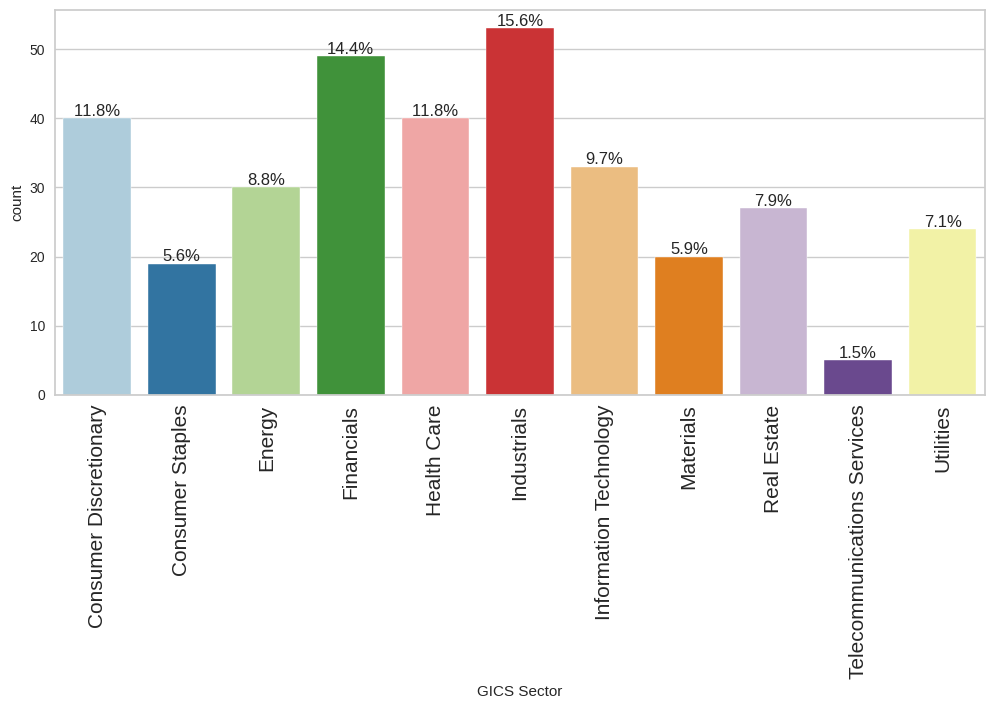

In [46]:
#GICS Sector
labeled_barplot(df, 'GICS Sector', perc=True)

Industrials is the most frequently represented sector, 15.6%.

Financials is the second most common in this sector, 14.4%.


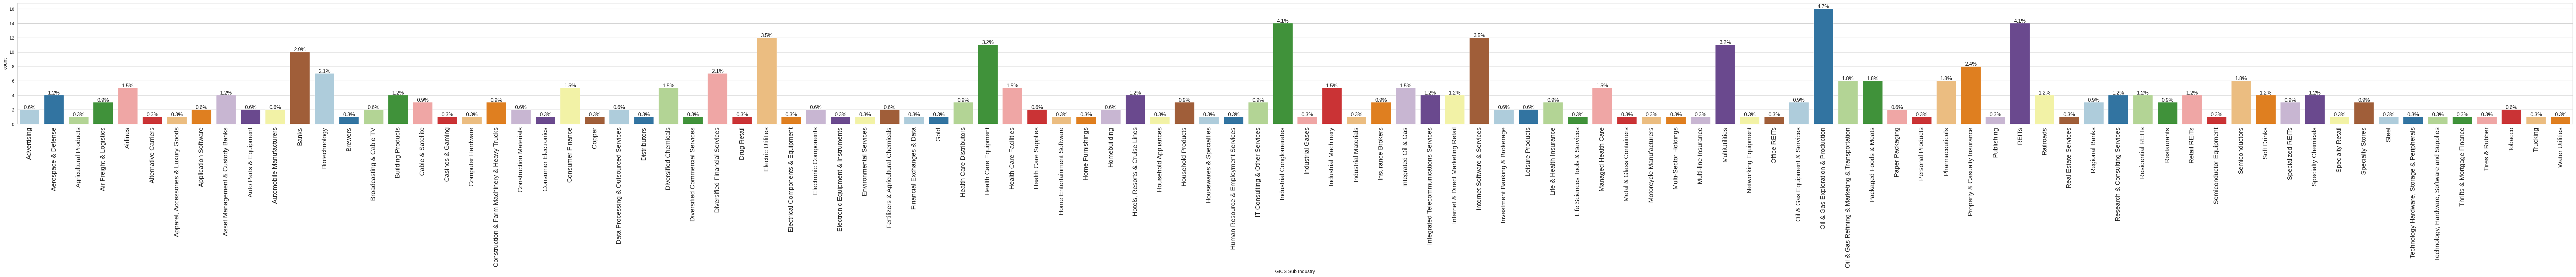

In [59]:
# GICS Sub Industry
labeled_barplot(df, 'GICS Sub Industry', perc=True)

In [49]:
#display the five sub industries with the most number of stocks
df['GICS Sub Industry'].value_counts().head(n=5)

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Electric Utilities                    12
Internet Software & Services          12
Name: GICS Sub Industry, dtype: int64

Oil & Gas Exploration & Production : This sub-industry has the highest number of stocks in the dataset, with 16 companies classified under it.

REITs is the second most common sub-industry, with 14 companies falling under this category.

The presence of 14 companies in the "Industrial Conglomerates" sub-industry indicates a diversity of businesses under this category.

# Bivariate Analysis

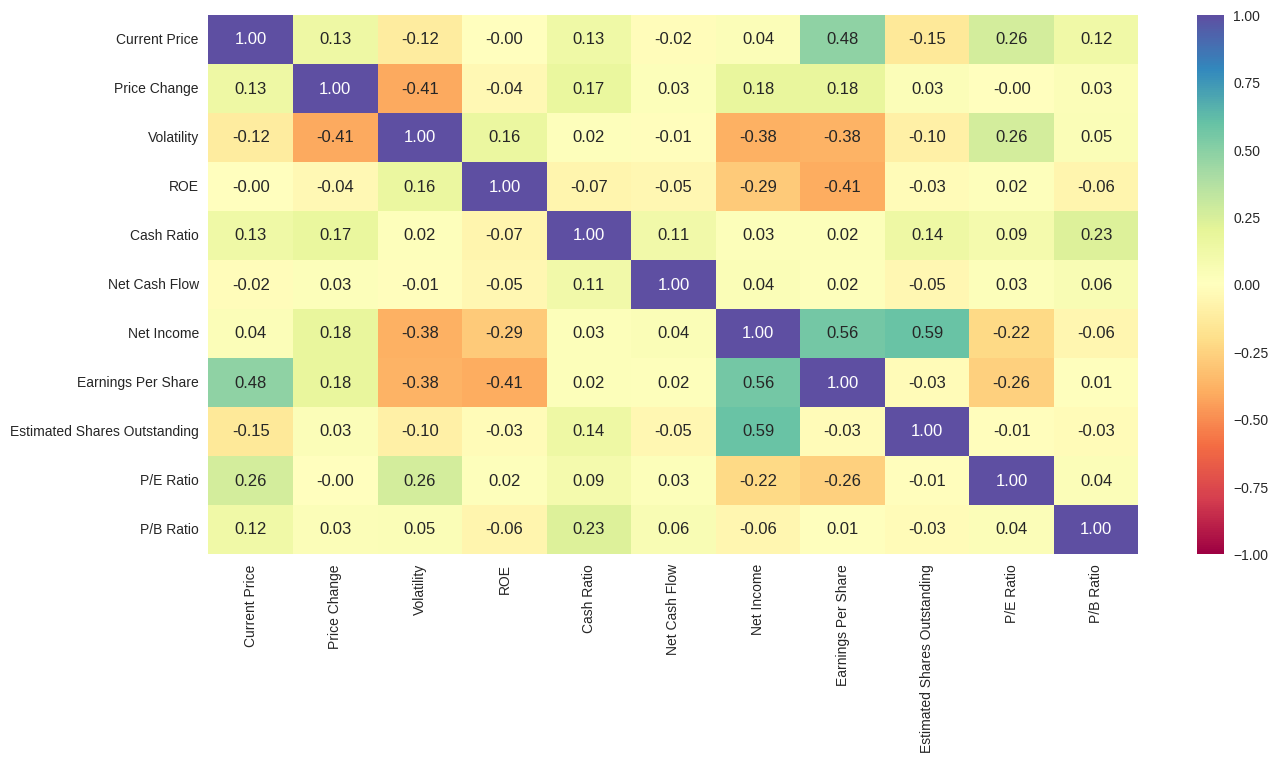

In [48]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Volatility and Price Change: The negative correlation (-0.41) between volatility and price change implies an inverse relationship. This means that as a stock becomes more volatile (experiences larger price fluctuations), its price is likely to drop.

Net Income and earnings per share (EPS) and estimated shares outstanding:
The positive correlation 0.56 / 0.59 respectively between net income and earnings per share (EPS) and estimated shares outstanding indicates that as a company's net income increases, it is likely to have a positive impact on EPS and estimated shares outstanding. This means that higher net income contributes to higher EPS / estimated shares outstanding, reflecting greater earnings available to each common share.

Earnings per share and Current Price: The positive correlation 0.48 between earnings per share (EPS) and current price suggests that as a company's EPS rises, its stock price is also highly likely to increase.

EPS and ROE: The negative correlation -0.41 between EPS and return on equity (ROE) implies an inverse relationship. This means that as a company generates more equity for shareholders (higher ROE), an equivalent amount of net income in the following periods will generate a lower return.

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

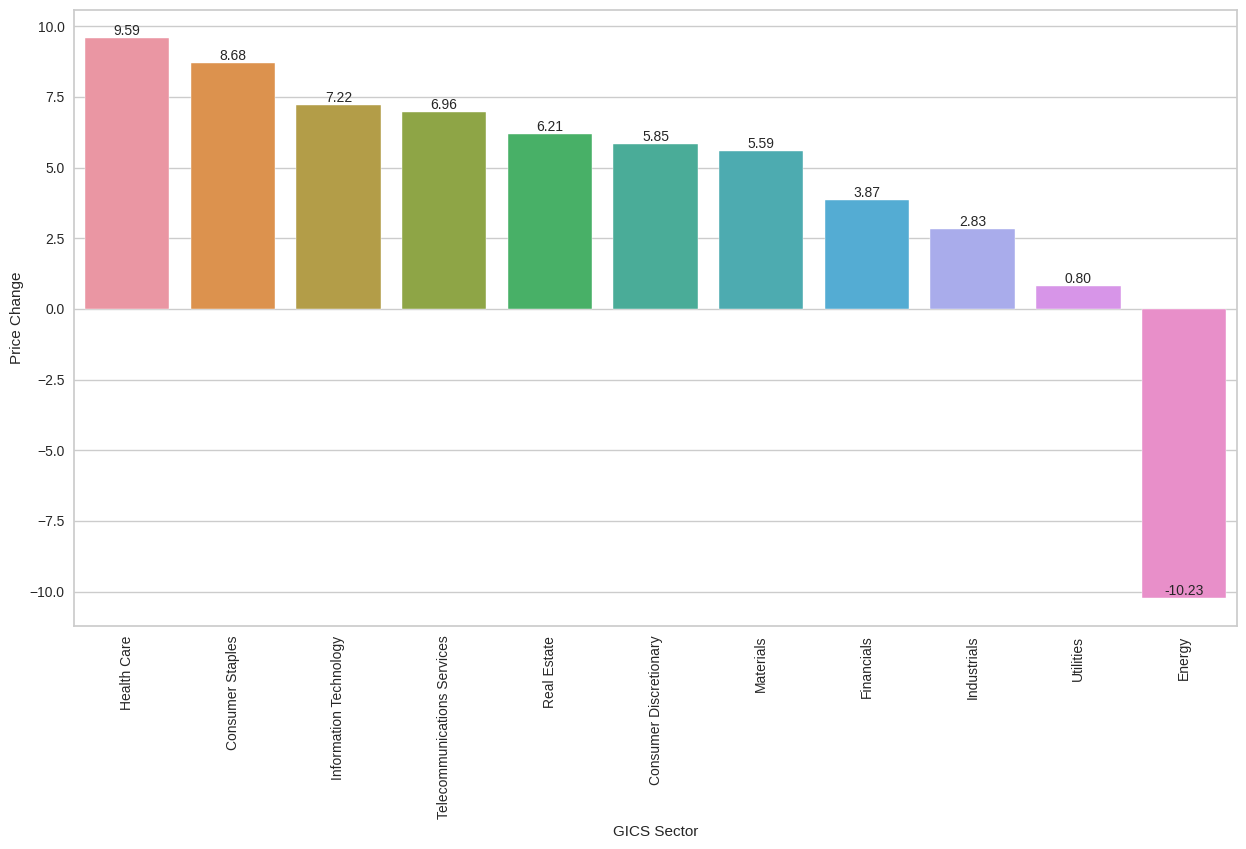

In [54]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False, order=df.groupby('GICS Sector')['Price Change'].mean().sort_values(ascending=False).index) #Show in descending order
plt.xticks(rotation=90)

# Adding labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

On average, stock price changes the most on health care sector , 9.59% increase while stocks in the energy sector decrease -10.23% the most.


**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

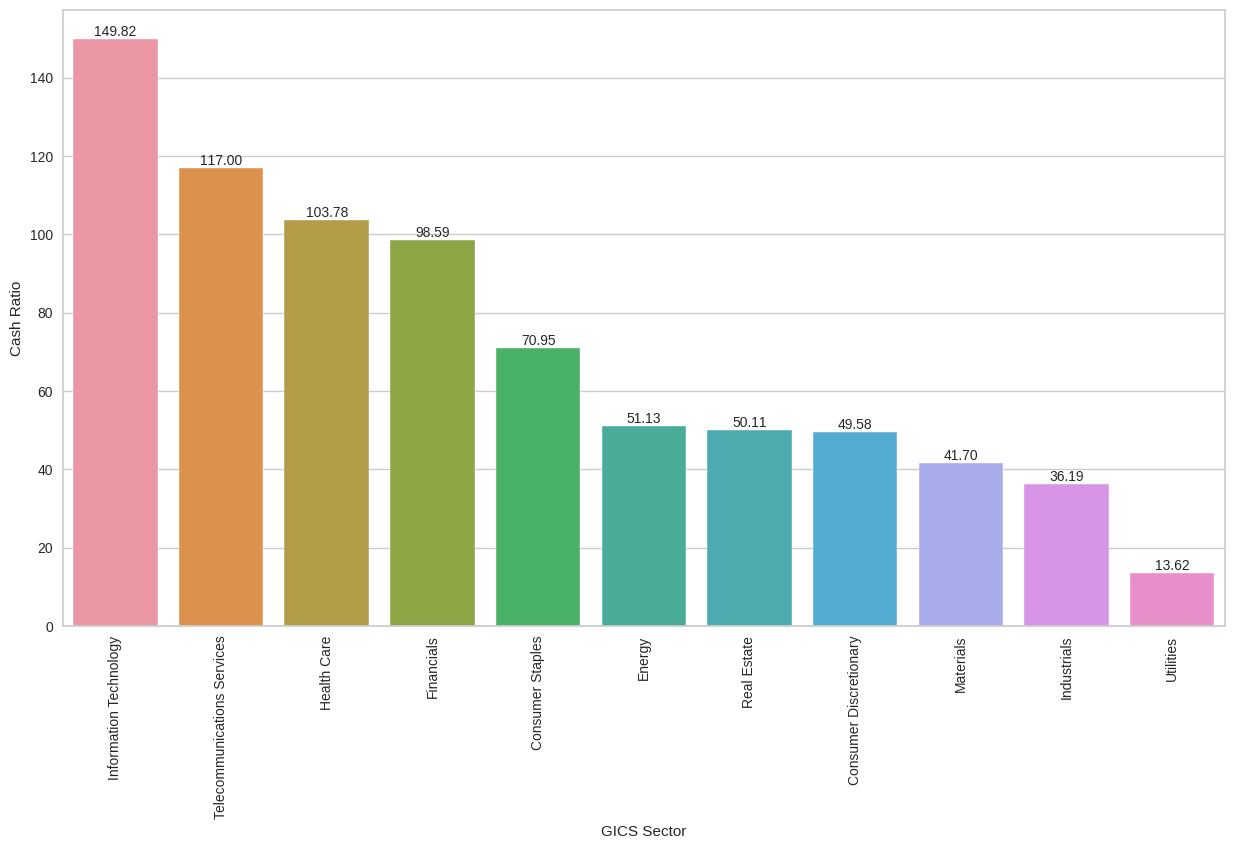

In [62]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df, x='GICS Sector',y='Cash Ratio', ci=False, order=df.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False).index) #Show in descending order
plt.xticks(rotation=90)

# Adding labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

Information Technology has the highest average cash ratio at 149.82, indicating that, on average, companies in this sector have a significant amount of cash and cash equivalents on hand to cover their short-term obligations. This suggests strong liquidity within the Information Technology sector.

Telecommunications Services follows closely with an average cash ratio of 117.00.

Health Care and Financials sectors have average cash ratios of 103.78 and 98.59, respectively, indicating strong liquidity positions.

P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.

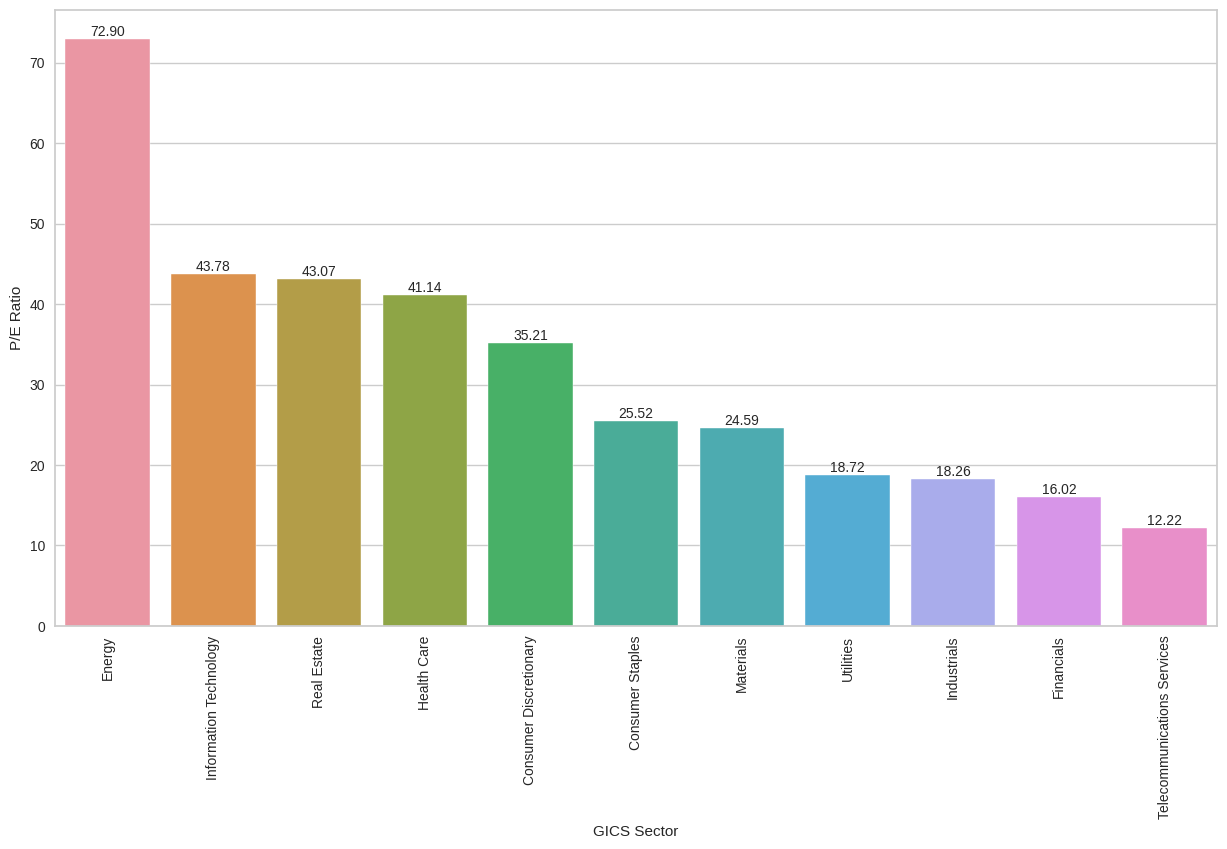

In [63]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df, x='GICS Sector',y='P/E Ratio', ci=False, order=df.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False).index) #Show in descending order
plt.xticks(rotation=90)

# Adding labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

The Energy sector has the highest average P/E ratio at 72.90. This suggests that investors in this sector are willing to pay a premium for a single share of a company's earnings, indicating a relatively higher valuation compared to other sectors.

The Information Technology sector follows closely with an average P/E ratio of 43.78. Investors in this sector are also willing to invest a significant amount for each dollar of earnings.

 Real Estate has an average P/E ratio of 43.07, indicating that investors are willing to pay a relatively high price for shares in this sector.

Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.

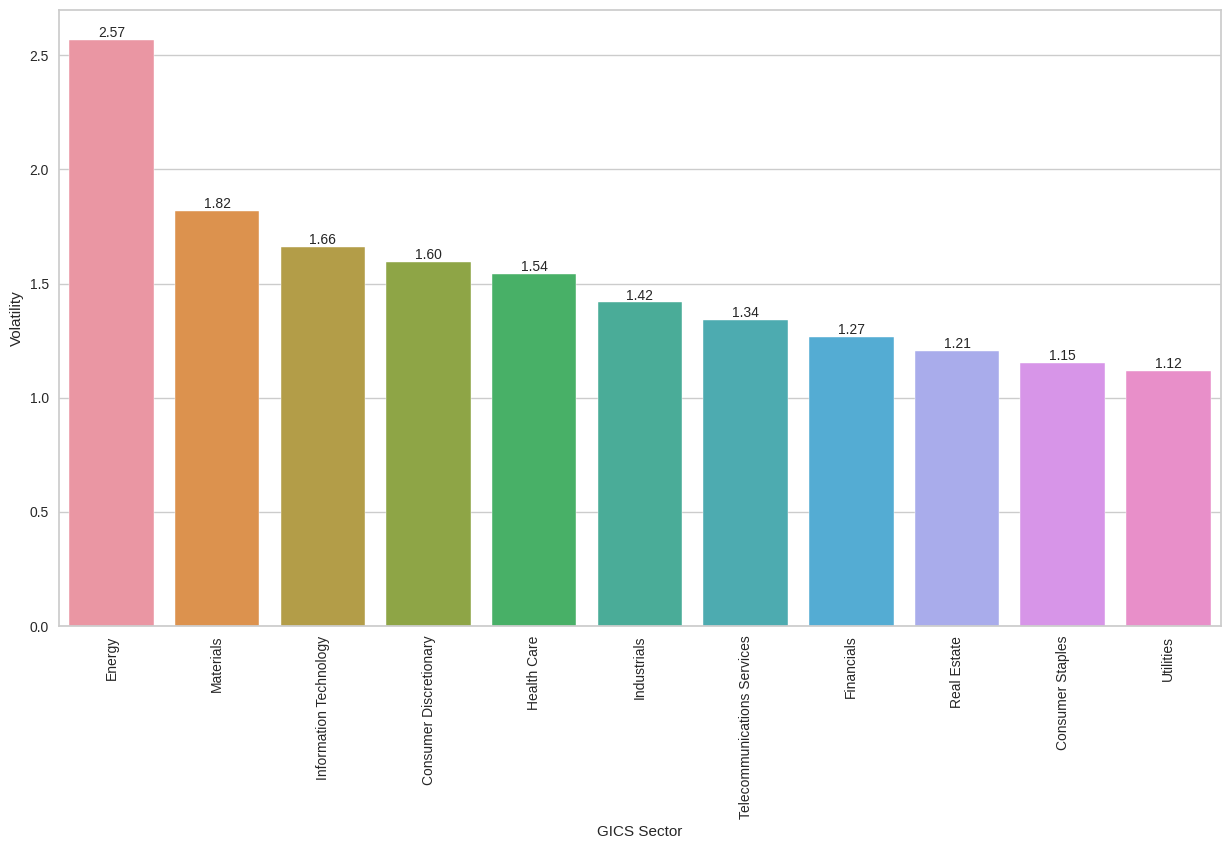

In [64]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df, x='GICS Sector',y='Volatility', ci=False, order=df.groupby('GICS Sector')['Volatility'].mean().sort_values(ascending=False).index) #Show in descending order
plt.xticks(rotation=90)

# Adding labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

The Energy sector has the highest average volatility at 2.568777. Stocks in this sector tend to exhibit sharp and frequent price changes, making them riskier investments.

Secondly, materials have an average volatility of 1.816726, indicating that stocks in this sector experience relatively higher price fluctuations.


## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

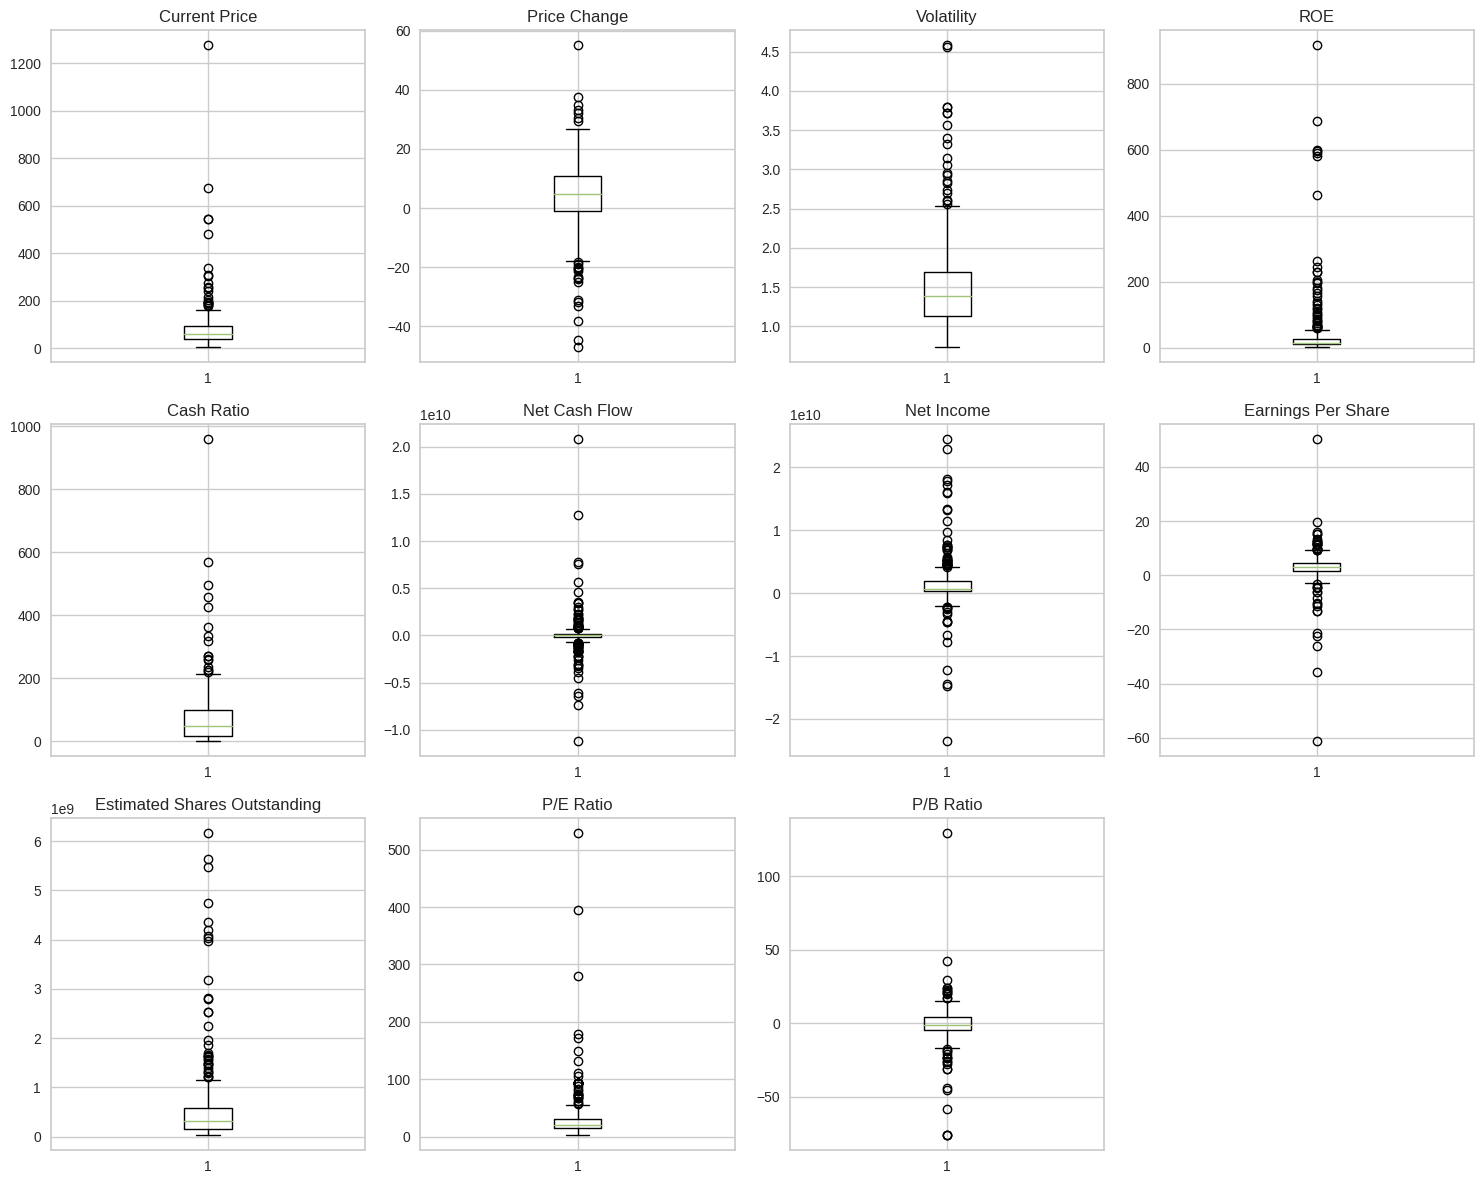

In [66]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Scaling

- Let's scale the data before we proceed with clustering.

In [68]:
# Define the subset of numerical columns to scale
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

In [69]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [70]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

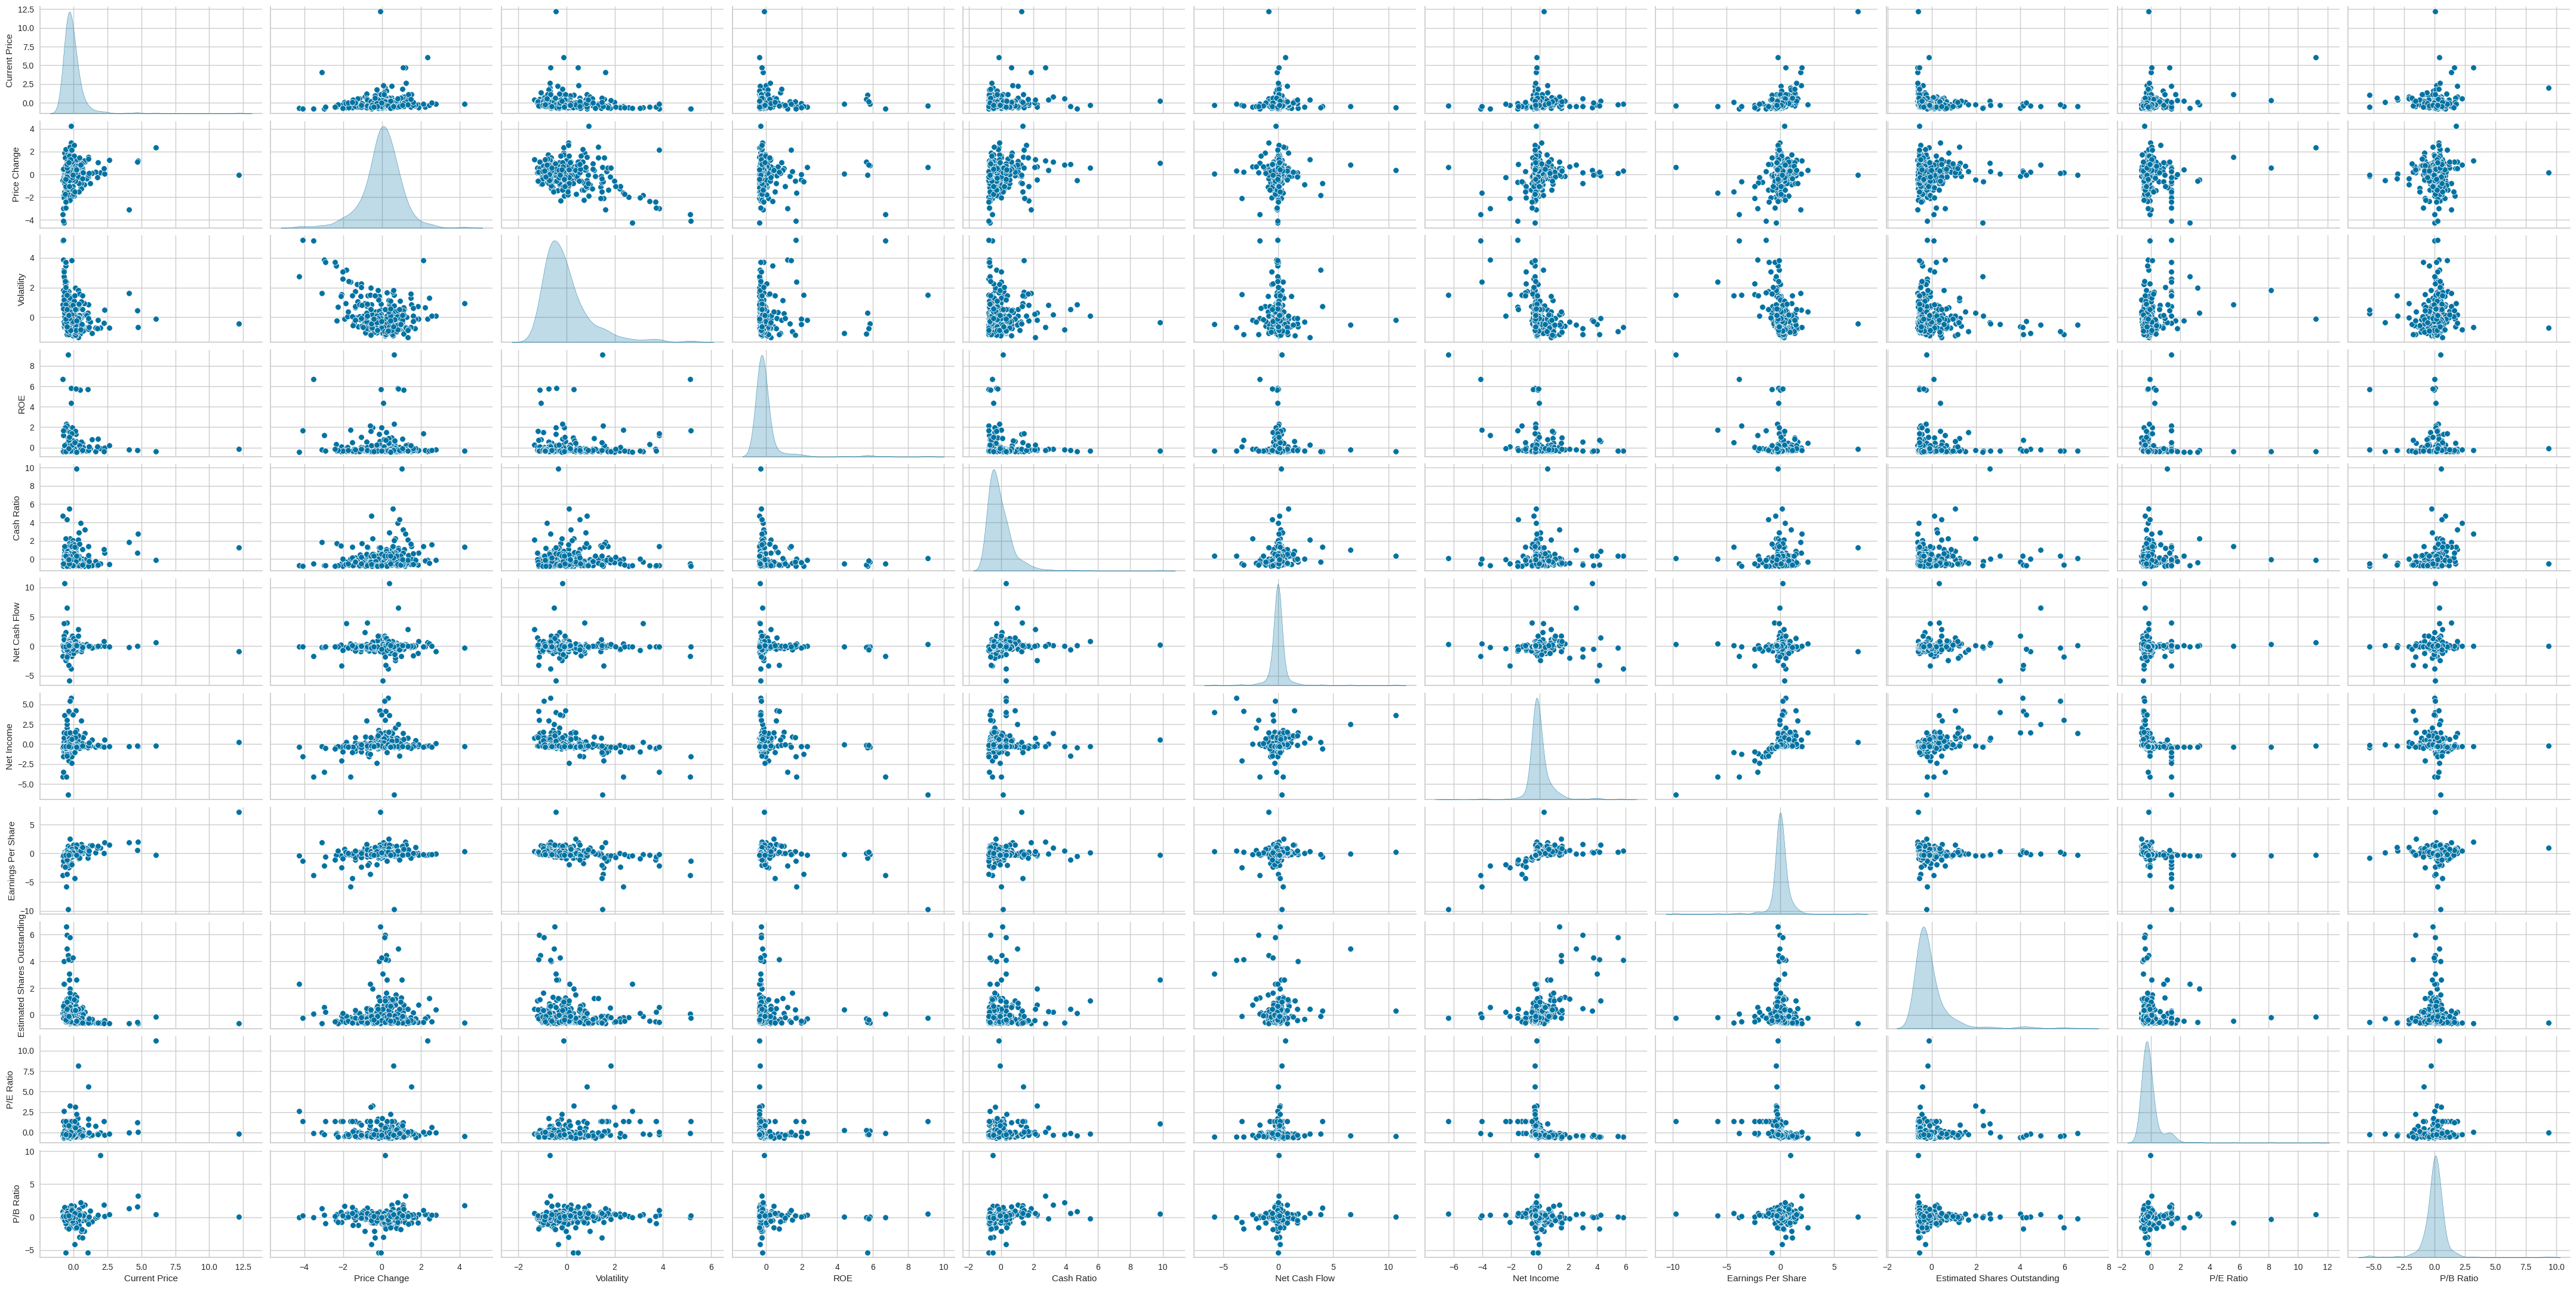

In [74]:
# pairplot for scaled dataframe
sns.pairplot(subset_scaled_df, height=2, aspect=2, diag_kind='kde')
plt.show()


After scaling, the distribution of each variable remains unchanged and are now standardized to have 0 of mean and 1 of standard deviation.

## K-means Clustering

### Checking Elbow Plot

In [75]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


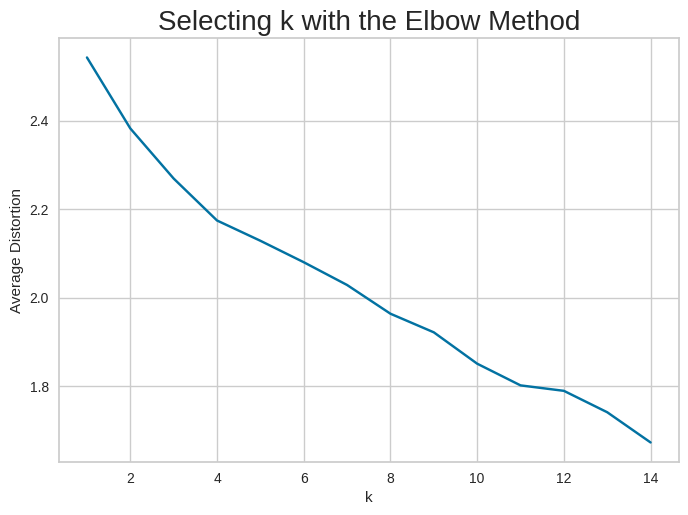

In [76]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

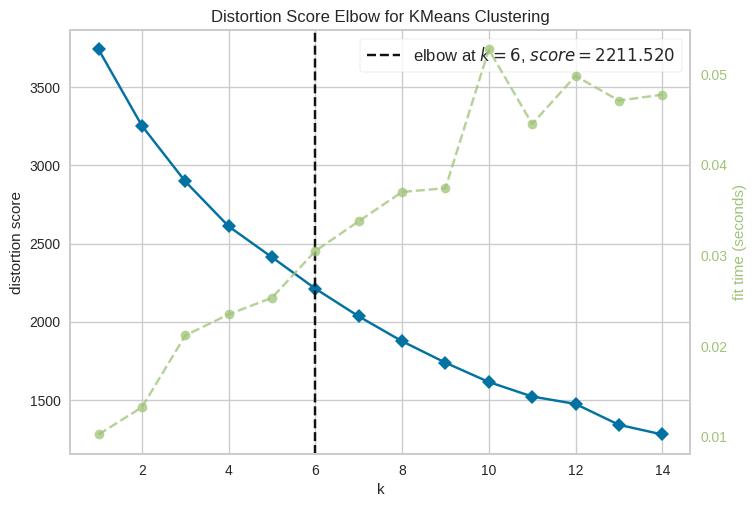

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


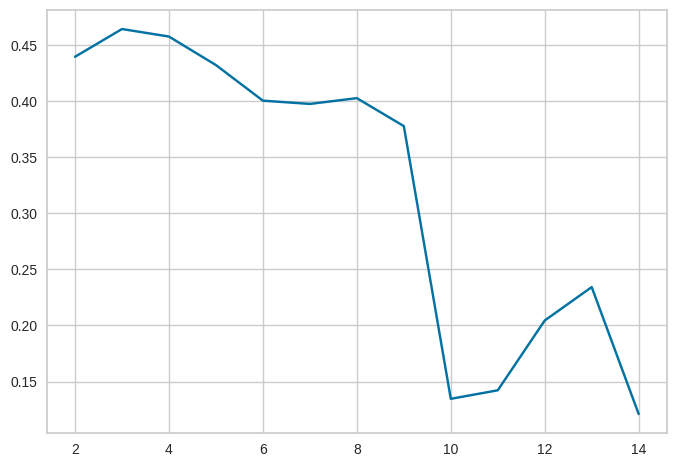

In [78]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

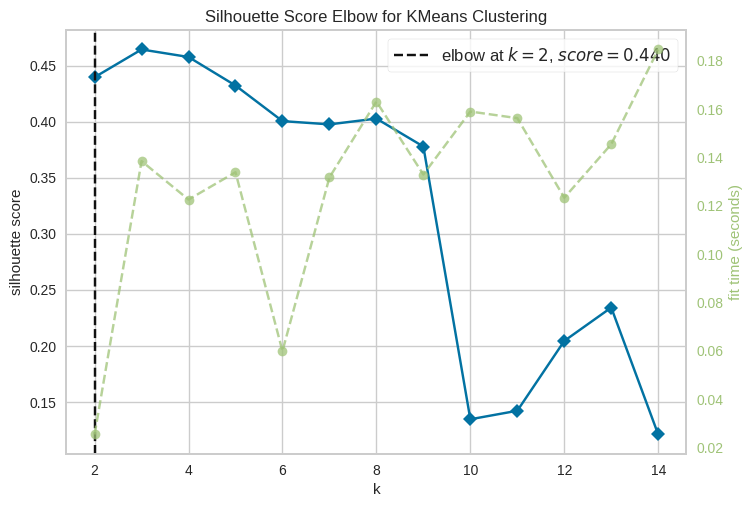

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [79]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

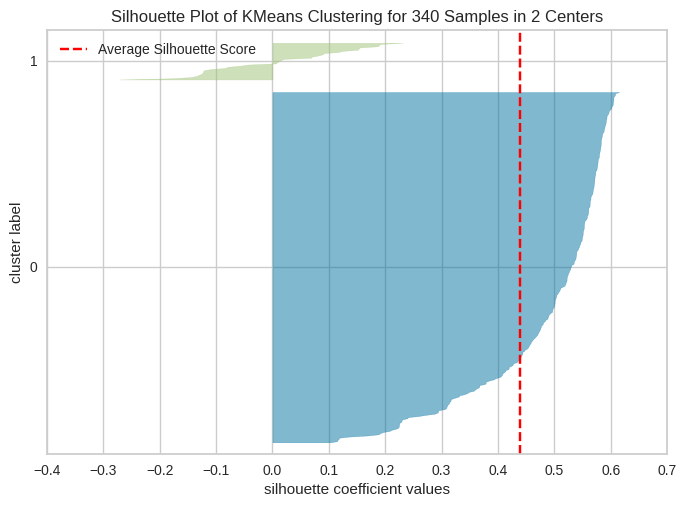

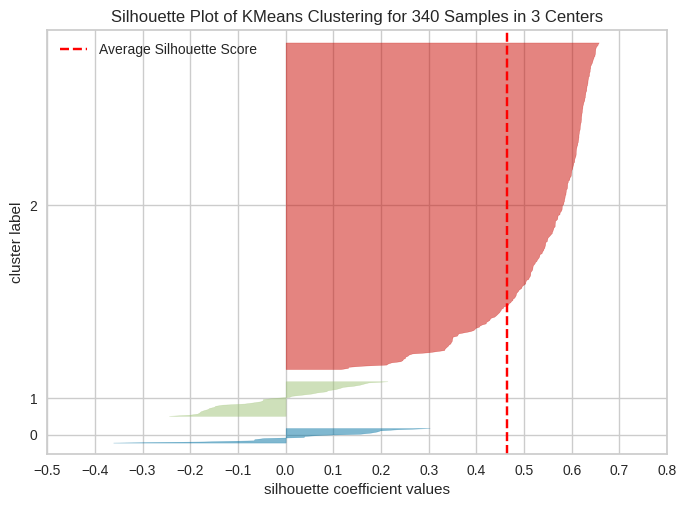

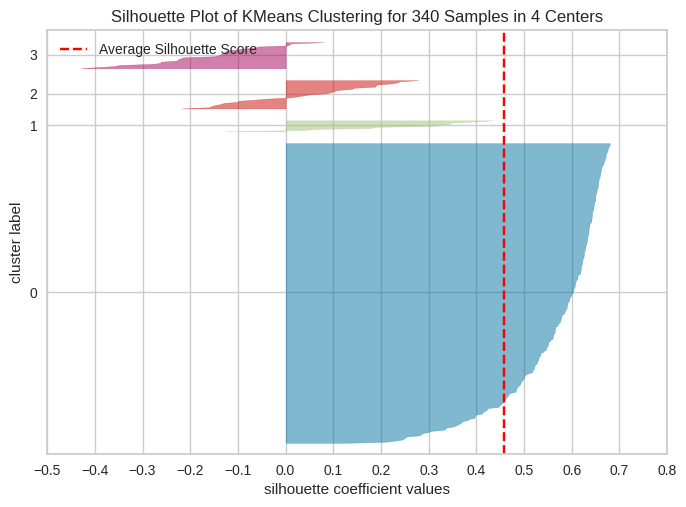

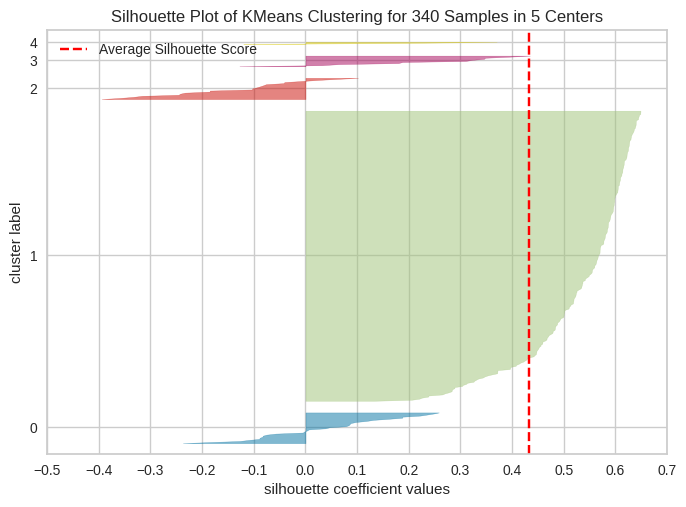

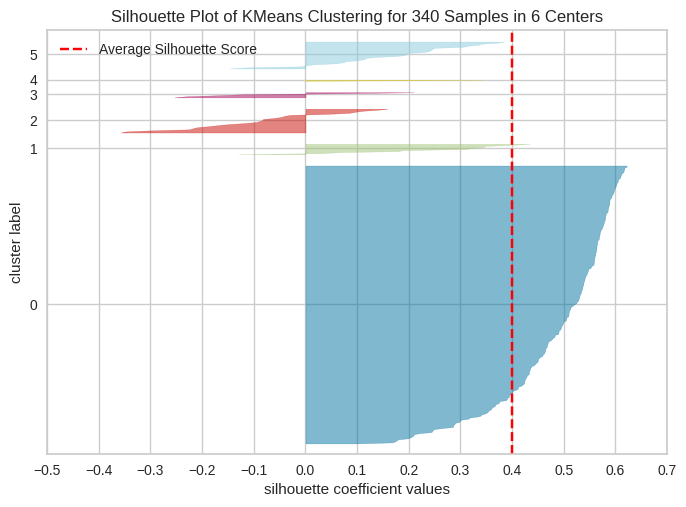

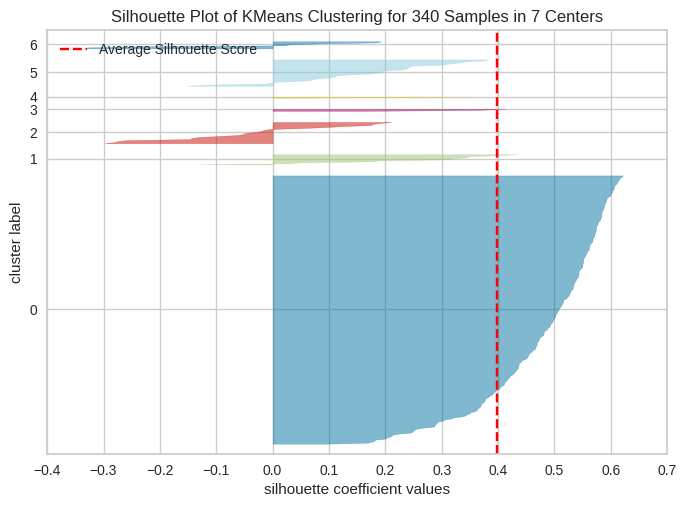

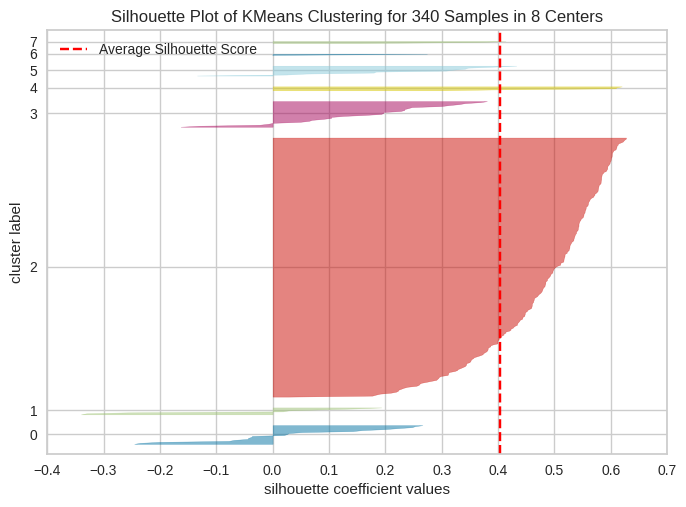

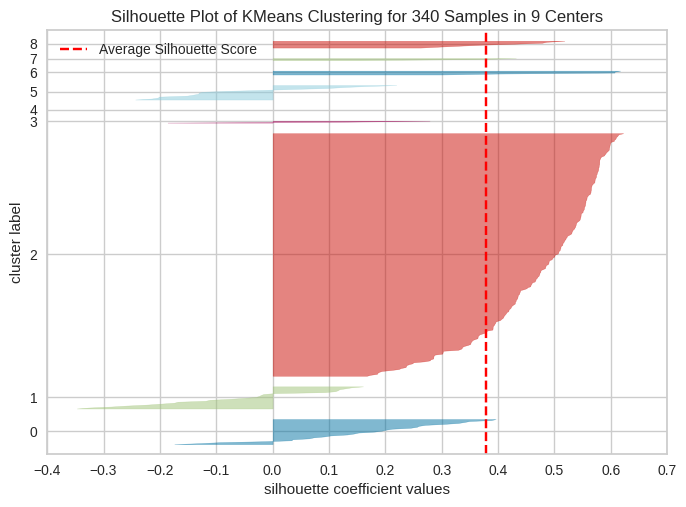

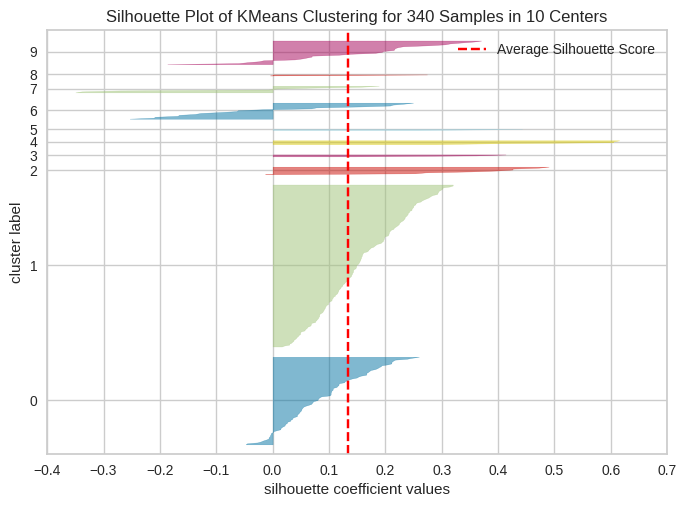

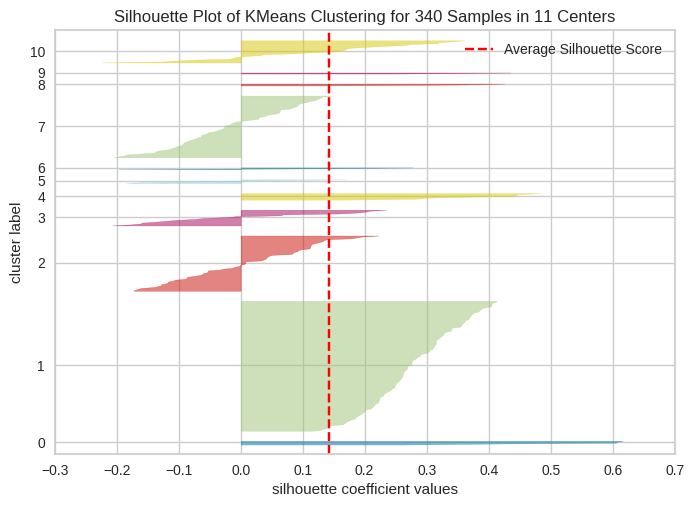

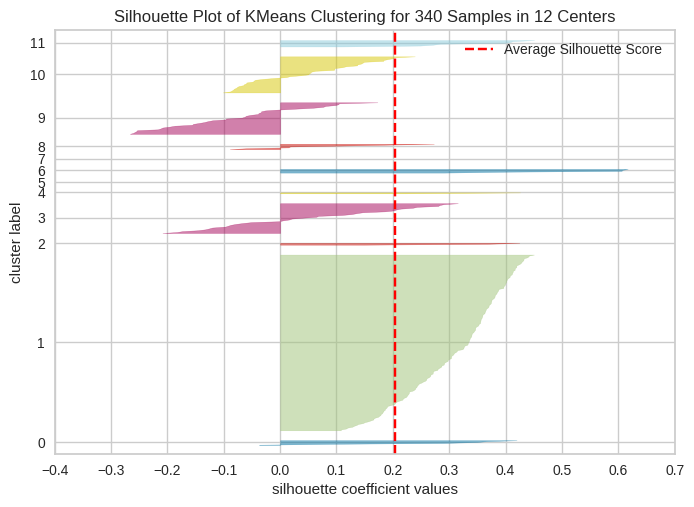

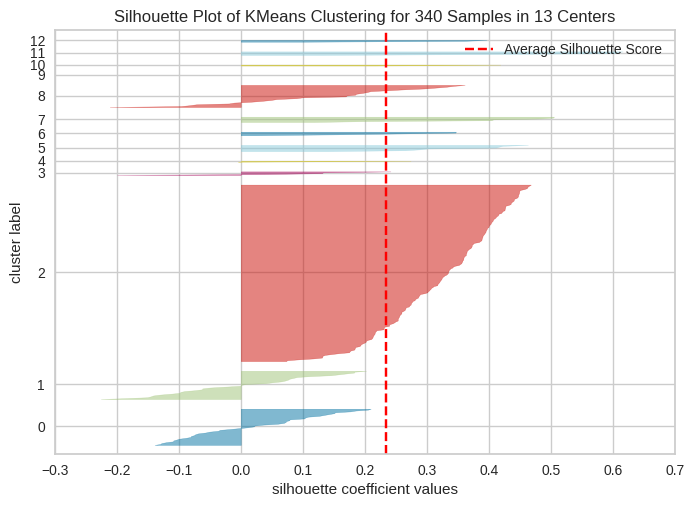

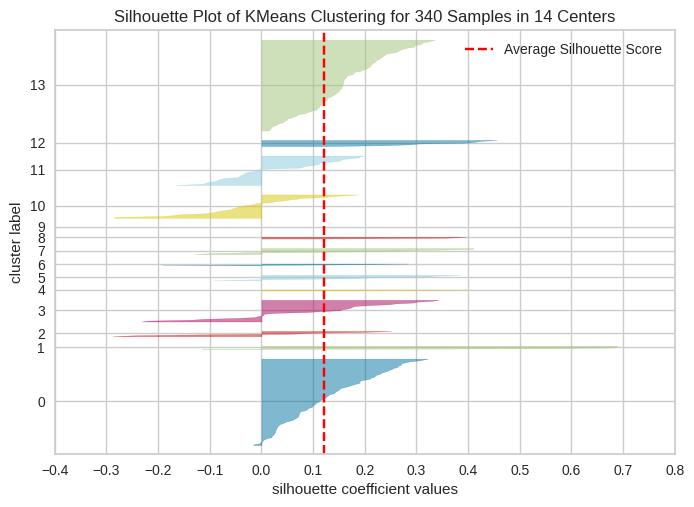

In [86]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Specify a range of cluster numbers to visualize
cluster_range = range(2, 15)

for n_clusters in cluster_range:
    model = KMeans(n_clusters=n_clusters, random_state=1)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    # Fit the visualizer to your data
    visualizer.fit(k_means_df)


    # Optionally, display the visualization
    visualizer.show()


From the silhouette score of 0.464 for 3 clusters is the highest.
Considering Elbow plots and Silhouette score, the number of clusters with the best performance appears to be 4,5,6.
But the silhouette score for 5 and 6 are not conviencing.

Therefore, 4 clusters is chosen with the best silhouette score.

### Creating Final Model

In [88]:
# final K-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [89]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [90]:
km_cluster_profile = df1.groupby('KM_segments').mean()

In [92]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

In [93]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [94]:
##  print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [95]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

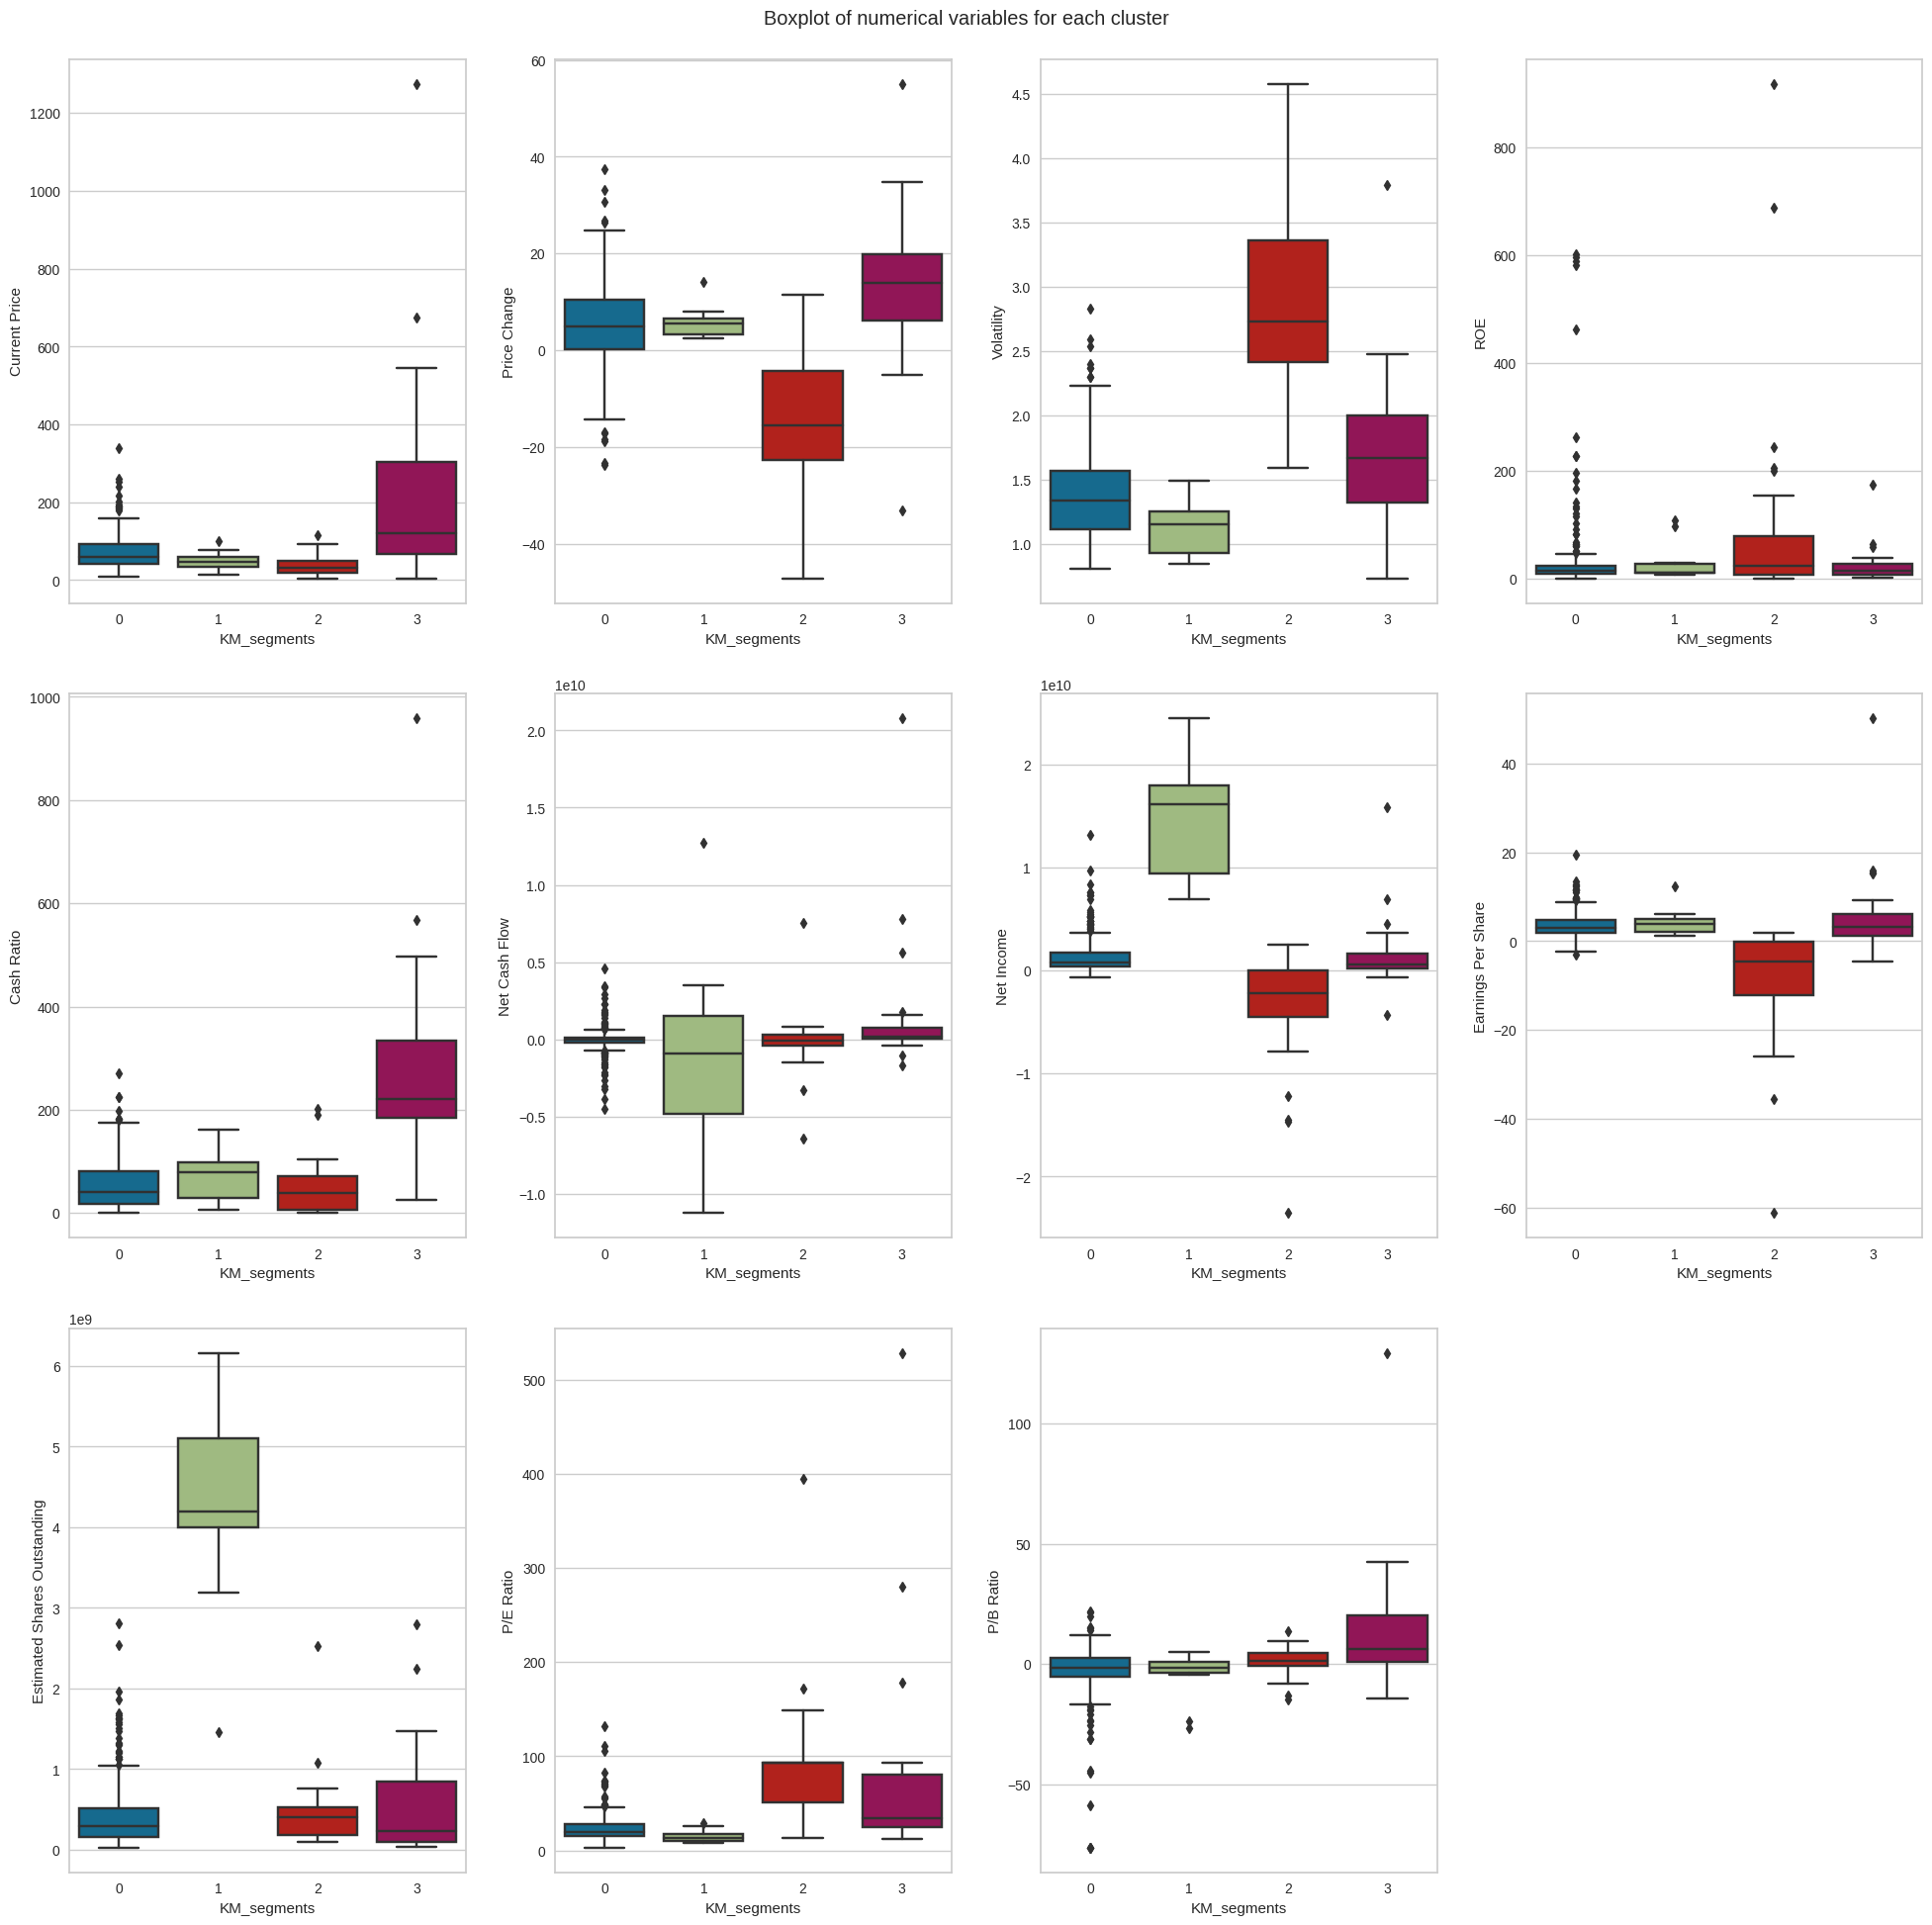

In [96]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

Cluster 0: This cluster includes a wide range of sectors, with 277 stocks. Main sector is industrial. Other notable sectors include Financials, Consumer Discretionary, Health Care, and Information Technology.
The cash ratio suggests that companies in this cluster have ample liquidity.
Companies have positive net income, indicating profitability.
These stocks have a relatively stable price and low volatility, making them suitable for risk-averse investors who are looking for stability and potential dividends.

Cluster 1:This cluster contains a smaller number of stocks 11.
This cluster is characterized by high profitability and strong cash positions.
Companies have high ROE, suggesting efficient use of equity.
The relatively low P/E ratio indicates that these stocks may be undervalued.
Consider these stocks for potential growth and value investments.

Cluster 2:his cluster has 27 stocks.
Cluster 2 is primarily composed of companies from the Energy sector (22 companies). There are also a few companies from the Information Technology sector. T
Stocks in this cluster have low prices and high volatility.
The negative earnings and P/B ratio may indicate financial challenges.
High risk.

Cluster 3: This cluster contains 25 stocks.These stocks are spread across different sectors.
These stocks have a relatively high current price and moderate volatility.
Companies have strong profitability, positive cash flow, and high P/E ratios.
These stocks may be suitable for growth-oriented investors, but conduct a more detailed analysis for individual stock selection.

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [97]:
hc_df = subset_scaled_df.copy()

In [99]:
# list of distance metrics
distance_metrics =  ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

The highest cophenetic correlation value of 0.9422540609560814 was achieved with the Euclidean distance metric and and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [100]:
# list of linkage methods
linkage_methods =["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

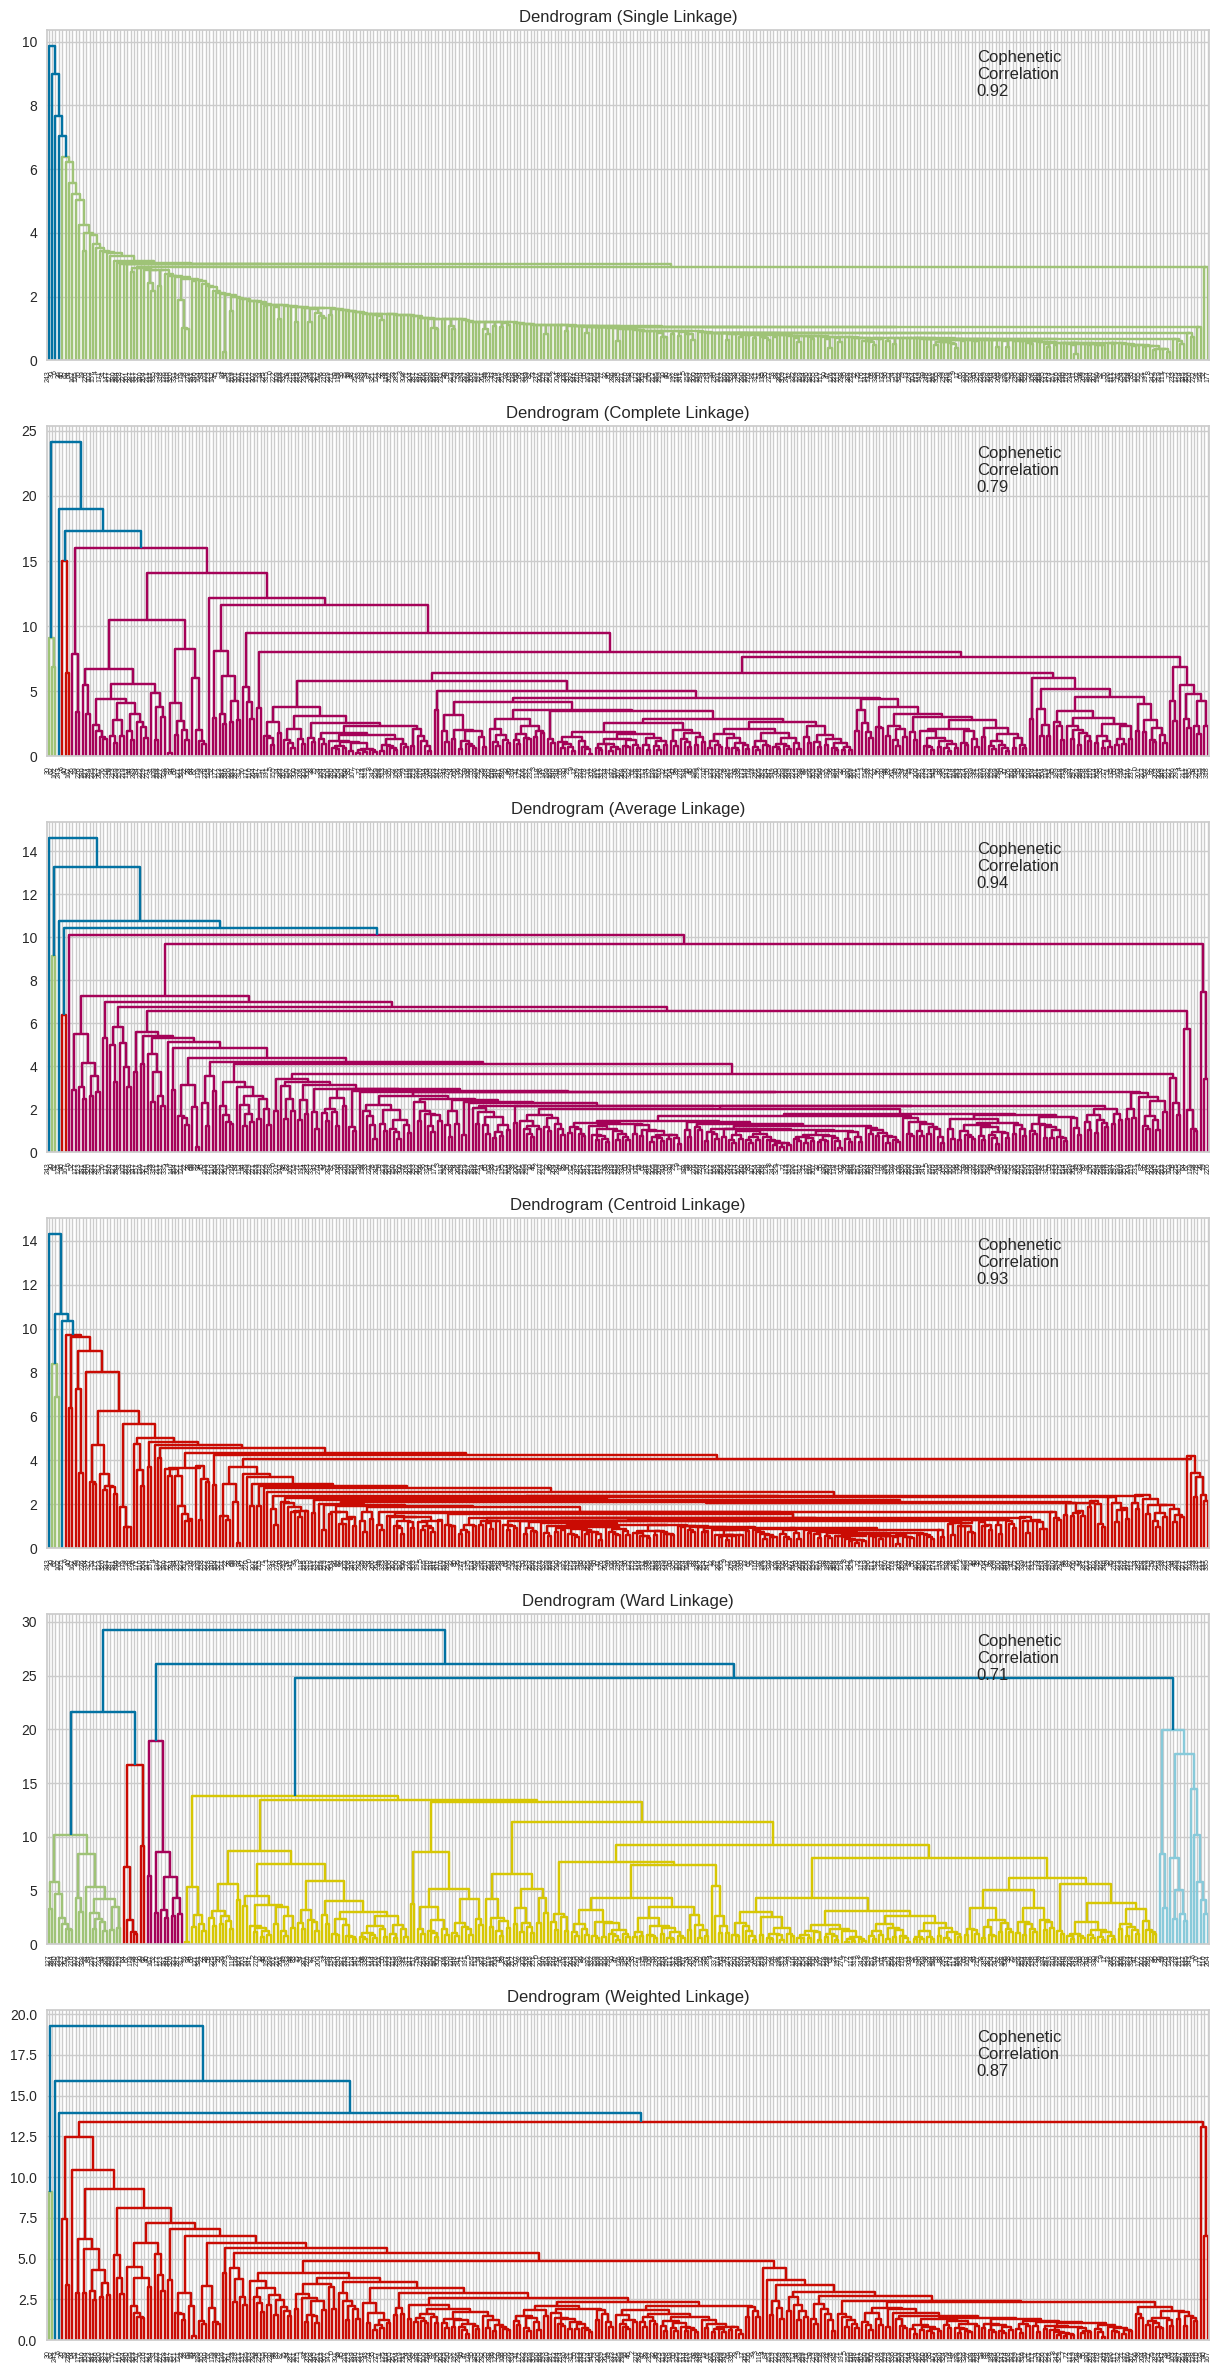

In [101]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

The cophenetic correlation is highest for average and centroid linkage methods, but the dendrogram for average appears to provide better clusters
5 appears to be the appropriate number of clusters for the average linkage method

In [102]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                0.710118
1  complete                0.787328
5  weighted                0.869378
0    single                0.923227
3  centroid                0.931401
2   average                0.942254

### Creating model using sklearn using 5 clusters , Euclidean distance and average linkage.


In [103]:
HCmodel = AgglomerativeClustering(n_clusters= 5 , affinity='euclidean', linkage='average')
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [104]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [107]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [108]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [109]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [110]:
## print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New Y

In [111]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    40
             Industrials                    53
             Information Technology         31
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Financials                      1
             Information Technology          1
2            Energy                          2
3            Information Technology          1
4            Consumer Discretionary          1
Name: Security, dtype: int64

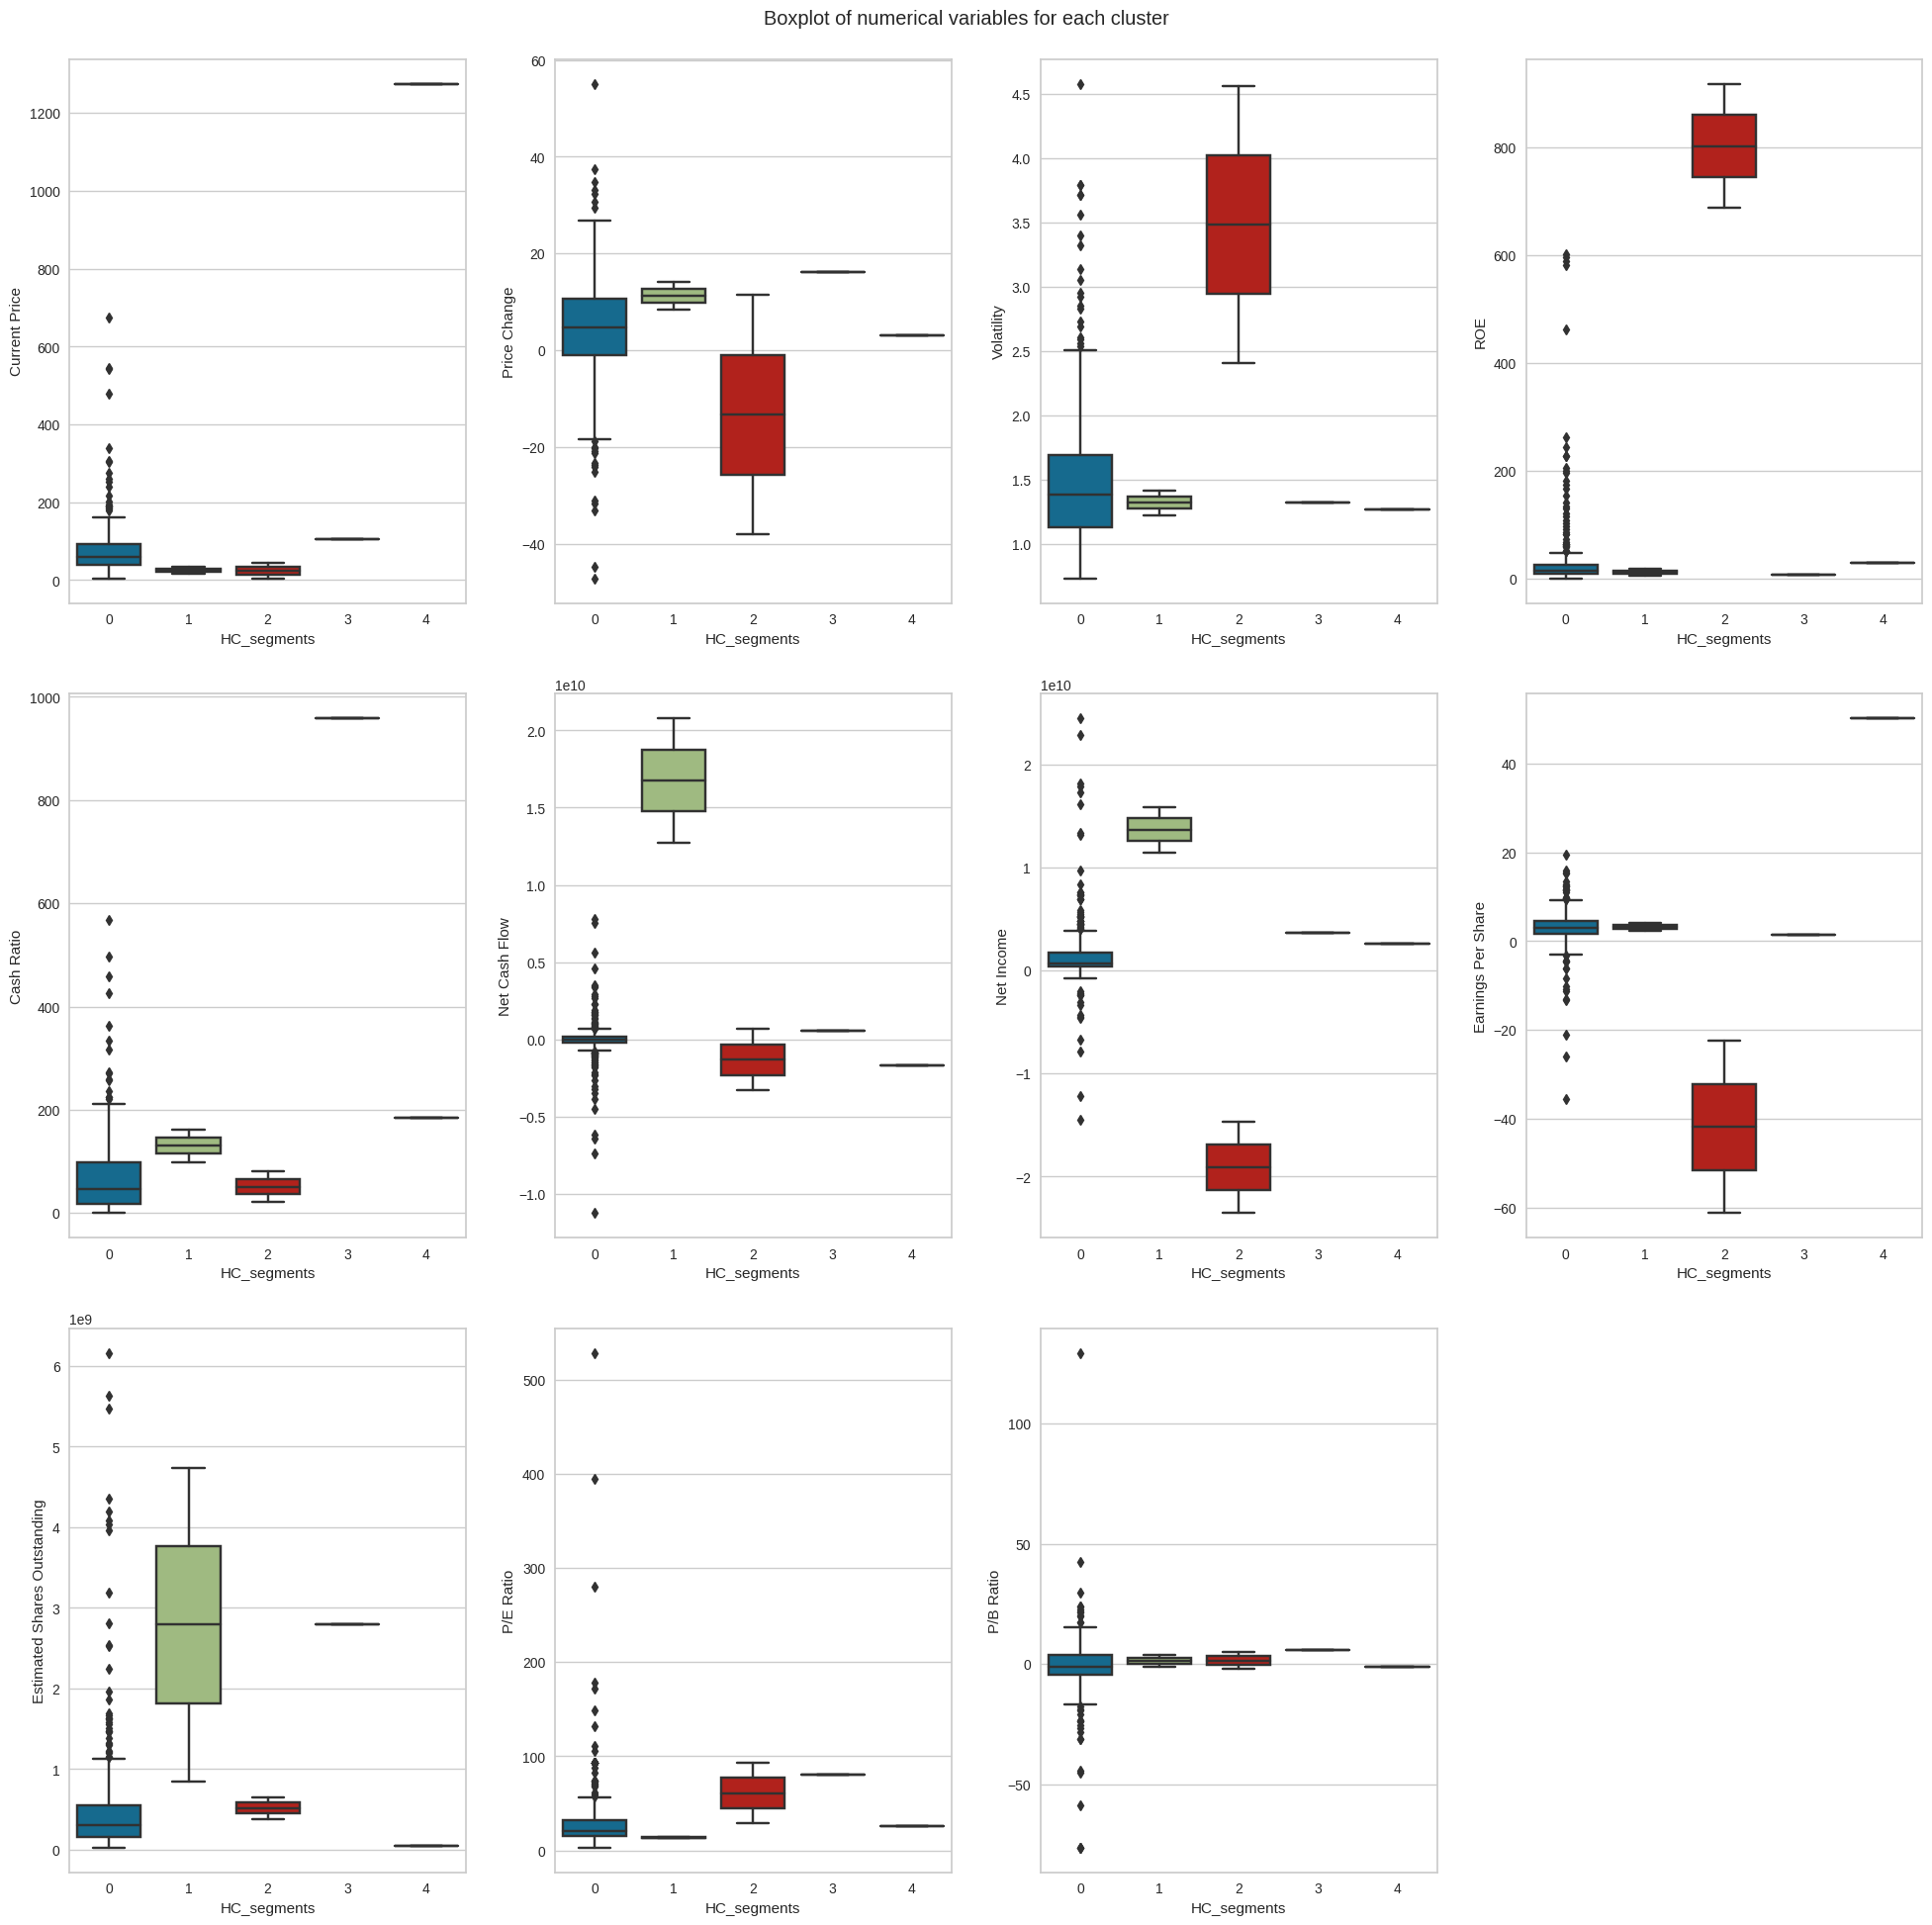

In [112]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

- Cluster 1 and 2 has only 2 stocks respectivvely. Cluster 3 has a single stock.While, cluster 0 has 334 stocks.
The clustering does not have enough variability.


In contrasts, the dendrogram for Ward linkage appears to provide better clustering, with 4 appearing to be the appropriate number of clusters

In [113]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [114]:
# creating a copy of the original data
df3=df.copy()
# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df3["HC_segments"] = HCmodel.labels_

Cluster Profiling

In [115]:
hc_cluster_profile = df3.groupby("HC_segments").mean()

In [116]:
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments")["Security"].count().values
)

In [117]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [118]:
## print the companies in each cluster
for cl in df3["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df3[df3["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [119]:
df3.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Industrials                     1
             Information Technology          1
             Materials                       1
1            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consum

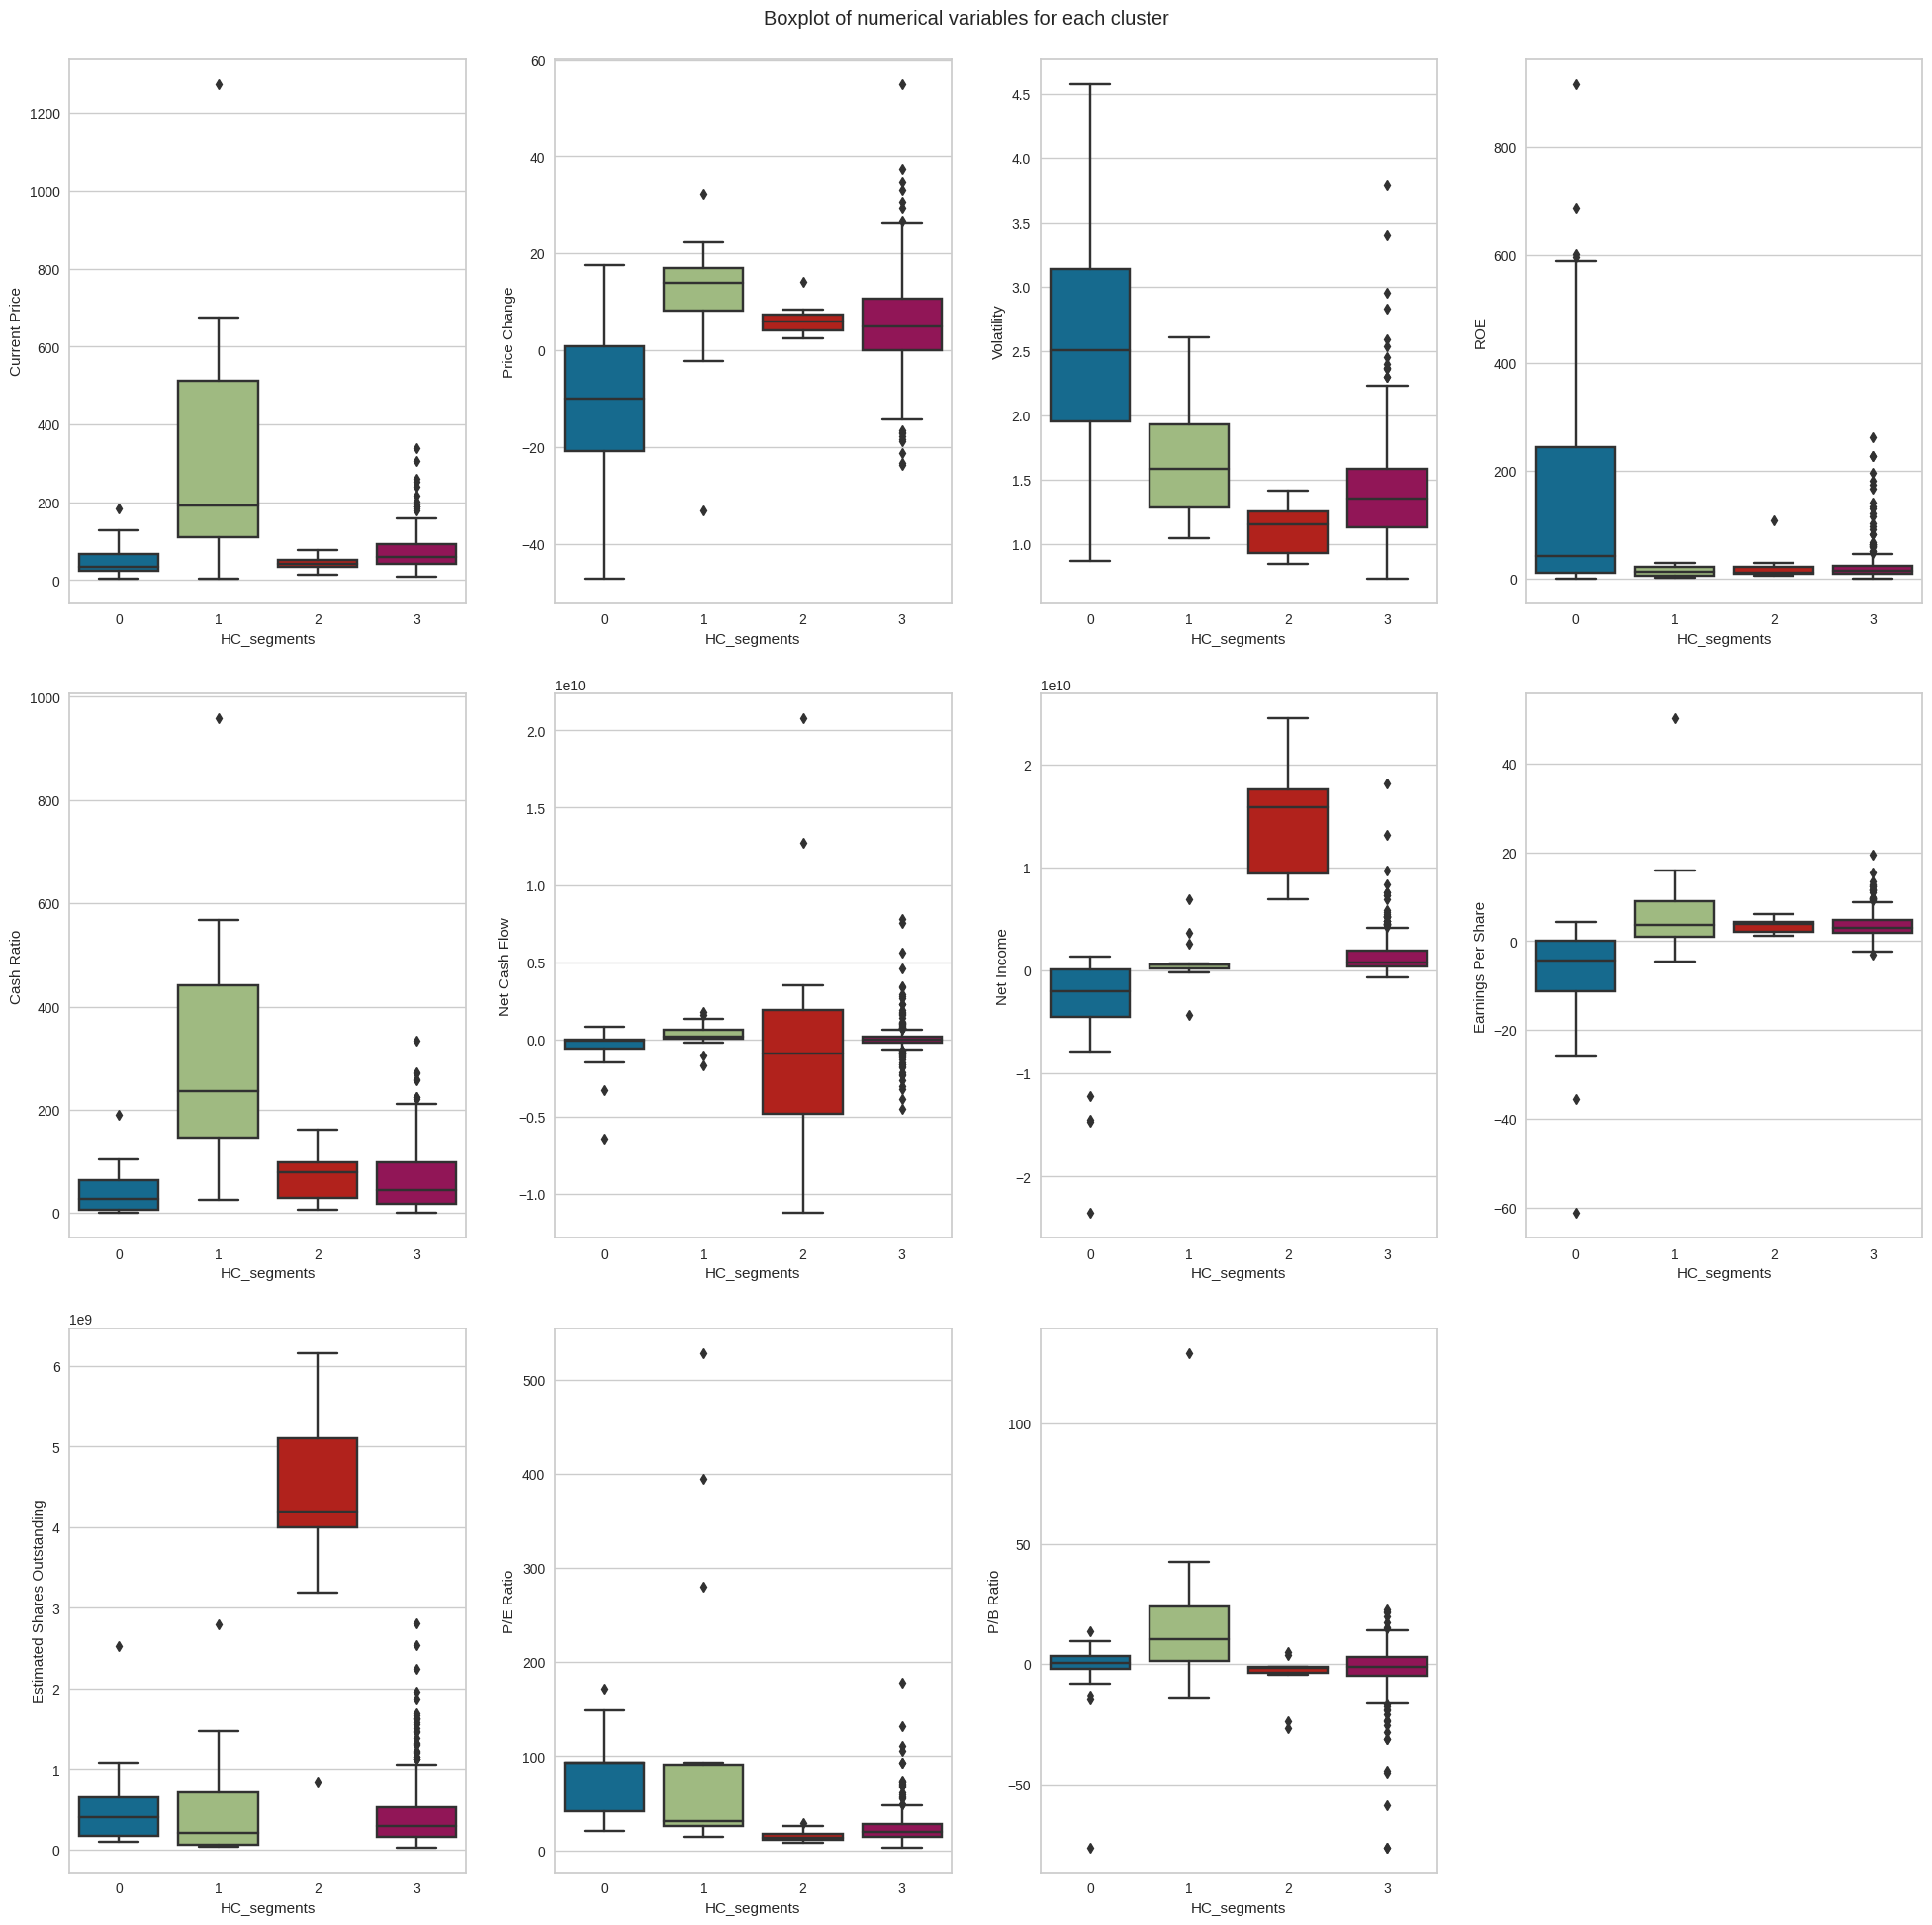

In [120]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df3, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**Cluster 0 (High-Value Stocks):**
- The companies in Cluster 0 have relatively low current prices and negative price changes.
- These stocks are highly volatile with a negative P/E ratio and negative P/B ratio.
- This cluster may involve turnaround opportunities.

**Cluster 1 (High-Value and Growth Stocks):**
- Cluster 1 includes stocks with high current prices, positive price changes, and relatively low volatility.
- These stocks have positive P/E and P/B ratios, indicating potential value and growth opportunities.
- Investors interested in a combination of value and growth may find appealing options within this cluster. These stocks appear to be performing well with growth potential.

**Cluster 2 (Moderate Value Stocks):**
- Companies in Cluster 2 have moderate current prices and moderate volatility.
- These stocks show relatively lower P/E ratios and P/B ratios.
- Investors may consider these stocks as moderate-value investments with the potential for growth and stability.

**Cluster 3 (Mixed Portfolio with Moderate Value):**
- Cluster 3 is the largest cluster, with a mix of companies from various sectors.
- These companies have a range of characteristics, including moderate current prices and volatility.
- The P/E and P/B ratios are also moderate.
- Investors with diversified portfolios looking for a mix of value and potential growth opportunities may explore stocks within this cluster.


## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

Comparing K-means and Hierarchical Clustering:

1. **Execution Time:**
   - K-means clustering is generally faster in terms of execution time.
   - Hierarchical clustering, particularly with a large dataset, can be computationally intensive. It involves calculating pairwise distances, forming a hierarchy, and dendrogram, which can take more time.

2. **Distinct Clusters:**
   - K-means aims to create clusters of roughly equal sizes, which may lead to clusters with similar numbers of observations. The clusters in K-means tend to be more evenly sized and distinct.
   - Hierarchical clustering can result in clusters that vary in size, and the dendrogram allows for identifying both larger and smaller clusters.

3. **Observations in Similar Clusters:**
   - Both give similar clusters, with a single cluster of a majority of the stocks and the remaining four clusters containing 11-29 stocks

4. **Appropriate Number of Clusters:**
   - For both, 4 clusters provided distinct clusters with sufficient observations in each to reasonably differentiate which "type" of stock is representative of the cluster



## Actionable Insights and Recommendations

Based on the data analysis and clustering results, here are some actionable insights and recommendations for Trade&Ahead:

 **Diversified Portfolio Building:**
 Recommend diversified portfolios for their clients. Encourage clients to allocate investments across various clusters, as this will help balance their portfolios and reduce exposure to specific market risks.

 **Cluster-Specific Strategies:**
 Develop investment strategies tailored to each cluster. Consider the risk tolerance, financial goals, and investment horizon for clients in each cluster.Provide cluster-specific investment recommendations and strategies to align with the characteristics of the stocks in each cluster.


**Regular Portfolio Review:**
 Encourage clients to review their portfolios periodically and make adjustments based on changing market dynamics.Suggest that Trade&Ahead's clients regularly assess their investments and consider rebalancing when necessary.

**Market Research:**
 Keep Trade&Ahead updated with market research and data analysis. Ensure they are equipped with the latest insights and trends.
 Continuously provide insights on market trends, emerging sectors, and potential investment opportunities to keep clients informed.
